### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

### Load Raw Dataset (Combined_dataset.csv)

In [2]:
df = pd.read_csv("Combined_dataset.csv")

print(f"Loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()


Loaded dataset: 2827977 rows × 14 columns


Country             Area Waterbody Type        Date  Ammonia (mg/l)  \
0  Canada  SE649035-145565          River  12-01-1974        0.059248   
1  Canada  SE649035-145565          River  12-01-1975        0.039821   
2  Canada  SE649035-145565          River  12-01-1976        0.031341   
3  Canada  SE649035-145565          River  12-01-1977        0.020501   
4  Canada  SE649035-145565          River  12-01-1978        0.020023   

   Biochemical Oxygen Demand (mg/l)  Dissolved Oxygen (mg/l)  \
0                              1.30                   8.1500   
1                              1.38                   7.8000   
2                              2.23                   7.8000   
3                              1.61                   8.1500   
4                              1.64                   4.3708   

   Orthophosphate (mg/l)  pH (ph units)  Temperature (cel)  Nitrogen (mg/l)  \
0               0.011917        8.07500              9.885         0.343917   
1               0.009417        7.73333             10.150         0.449083   
2               0.011000        7.46667             10.235         0.220750   
3               0.012333        7.78333             11.116         0.572250   
4               0.006182        7.10000              7.068         0.371091   

   Nitrate (mg/l)  CCME_Values   CCME_WQI  
0        11.73155        100.0  Excellent  
1        11.82009        100.0  Excellent  
2        14.87472        100.0  Excellent  
3        15.89293        100.0  Excellent  
4        15.22888        100.0  Excellent

### Visualize the Raw Data

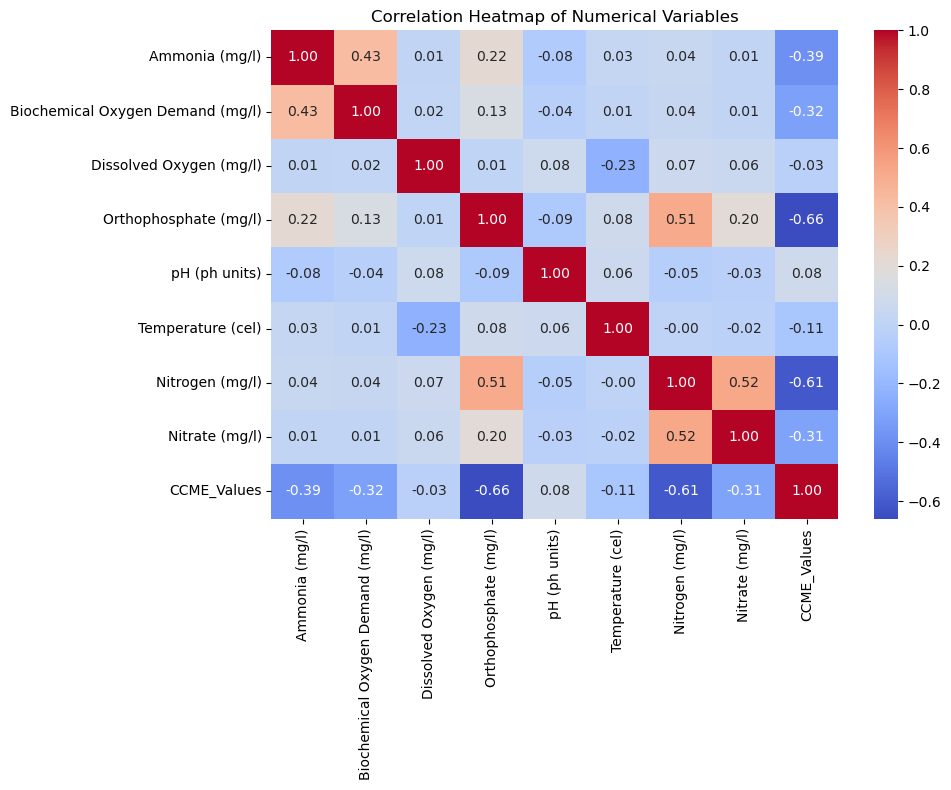

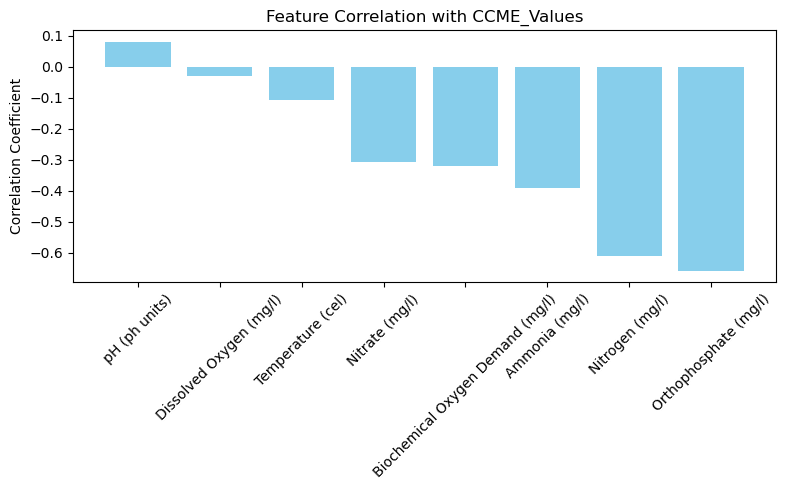

In [9]:
# ==========================================
# Call the "Visualize" function of raw data ("Combined_dataset.csv")
# ==========================================

#visualization
import data_visualization as dv

# Display only first two plots
dv.run_displayed_visualizations(output_folder="main_visualize")

# Save all other plots silently
# dv.run_silent_visualizations(output_folder="main_visualize/silent")   #Uncomment once to save the rest of the plots, otherwise too much run time is needed

===== DATASET OVERVIEW =====
Total Samples (rows): 2,827,977
Total Features (columns): 14

Numerical Features (9):
 - Ammonia (mg/l), Biochemical Oxygen Demand (mg/l), Dissolved Oxygen (mg/l), Orthophosphate (mg/l), pH (ph units), Temperature (cel), Nitrogen (mg/l), Nitrate (mg/l), CCME_Values

Categorical Features (5):
 - Country, Area, Waterbody Type, Date, CCME_WQI

===== NUMERICAL FEATURE STATISTICS =====


count       mean        std        min  \
Ammonia (mg/l)                    2827977.0   1.171360   5.668927  -0.005000   
Biochemical Oxygen Demand (mg/l)  2827977.0   4.886554  16.413632  -2.000000   
Dissolved Oxygen (mg/l)           2827977.0  10.007978   1.851052   0.000000   
Orthophosphate (mg/l)             2827977.0   0.710466   2.089436  -0.004000   
pH (ph units)                     2827977.0   7.735931   0.494687  -1.000000   
Temperature (cel)                 2827977.0  11.839341   5.010197  -5.260000   
Nitrogen (mg/l)                   2827977.0   5.209531   6.200423   0.000000   
Nitrate (mg/l)                    2827977.0   4.766794   6.073781   0.000000   
CCME_Values                       2827977.0  85.046683  17.646646  31.304144   

                                        25%       50%      75%    max  
Ammonia (mg/l)                     0.030000   0.05500    0.317  200.0  
Biochemical Oxygen Demand (mg/l)   1.600000   2.70000    2.830  255.0  
Dissolved Oxygen (mg/l)            9.860000  10.20000   11.000   20.0  
Orthophosphate (mg/l)              0.040000   0.10700    0.227  100.0  
pH (ph units)                      7.550000   7.78000    8.000   30.0  
Temperature (cel)                  8.990000  11.46000   14.200   98.0  
Nitrogen (mg/l)                    0.780000   4.00000    6.320   46.0  
Nitrate (mg/l)                     1.173000   4.50000    4.940  155.0  
CCME_Values                       77.153493  90.59609  100.000  100.0


===== MISSING VALUES SUMMARY =====


Missing Count  Missing %
Country                                       0        0.0
Area                                          0        0.0
Waterbody Type                                0        0.0
Date                                          0        0.0
Ammonia (mg/l)                                0        0.0
Biochemical Oxygen Demand (mg/l)              0        0.0
Dissolved Oxygen (mg/l)                       0        0.0
Orthophosphate (mg/l)                         0        0.0
pH (ph units)                                 0        0.0
Temperature (cel)                             0        0.0
Nitrogen (mg/l)                               0        0.0
Nitrate (mg/l)                                0        0.0
CCME_Values                                   0        0.0
CCME_WQI                                      0        0.0


===== TARGET VARIABLE SUMMARY: CCME_Values =====


count    2.827977e+06
mean     8.504668e+01
std      1.764665e+01
min      3.130414e+01
25%      7.715349e+01
50%      9.059609e+01
75%      1.000000e+02
max      1.000000e+02
Name: CCME_Values, dtype: float64

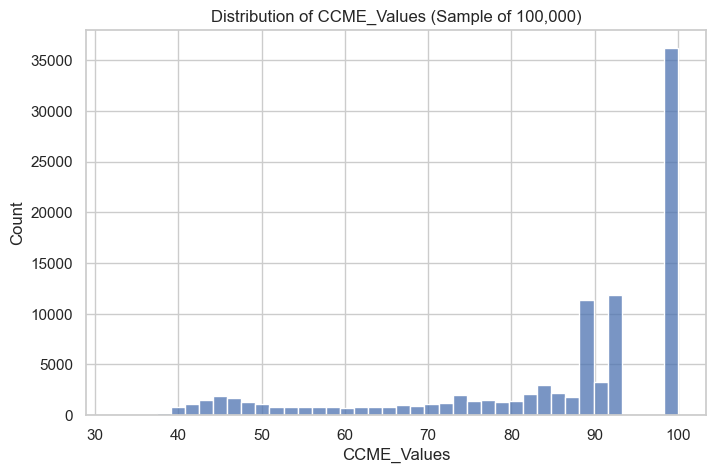


===== NUMERICAL FEATURE HISTOGRAMS =====


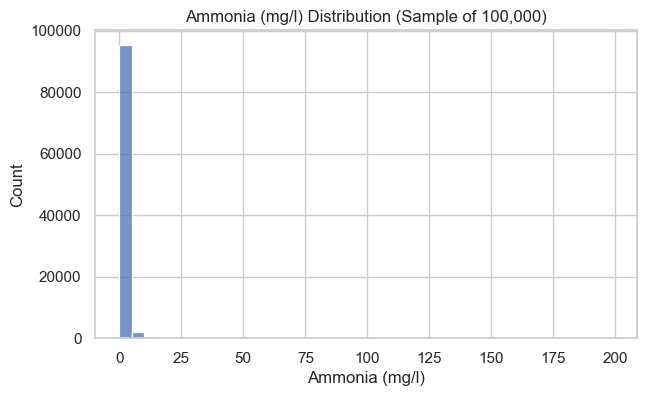

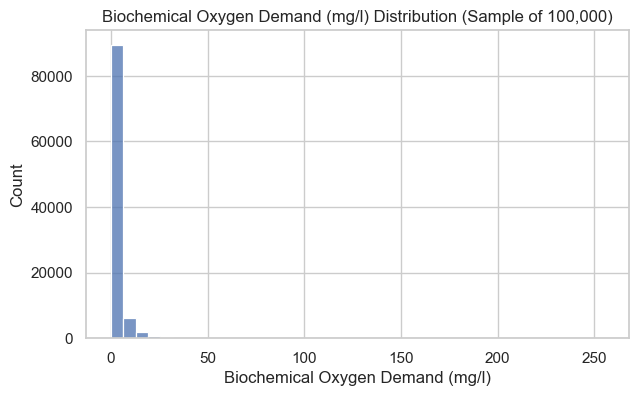

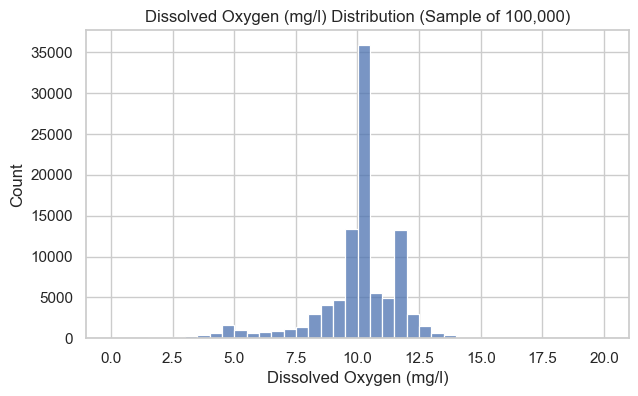

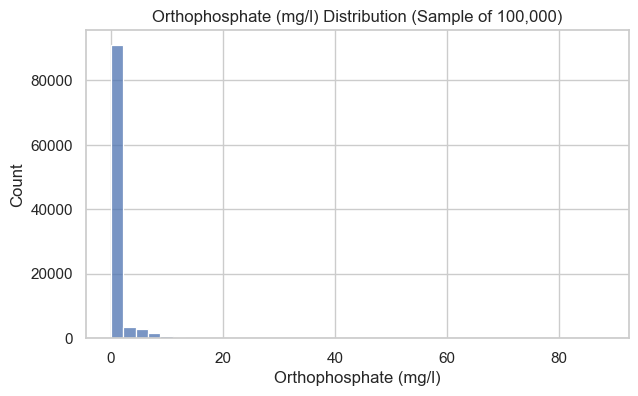

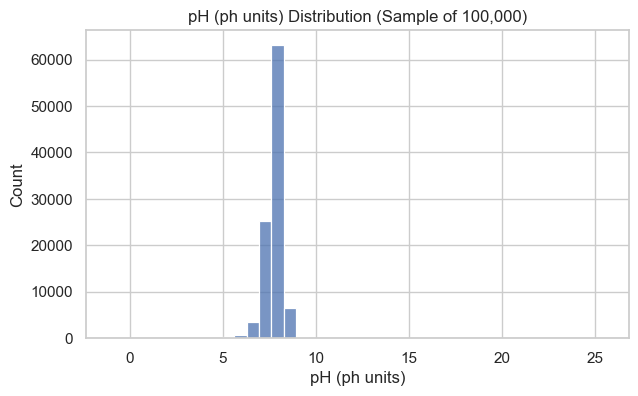

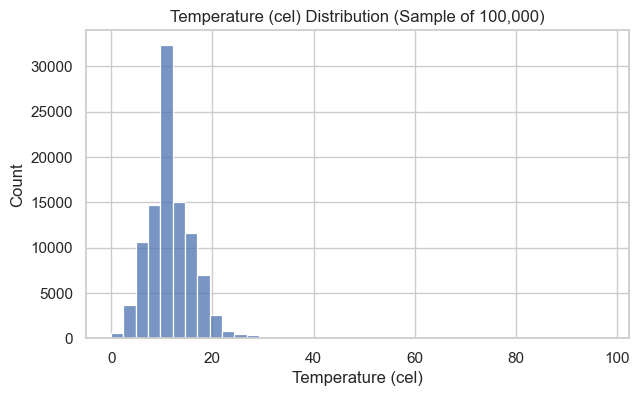

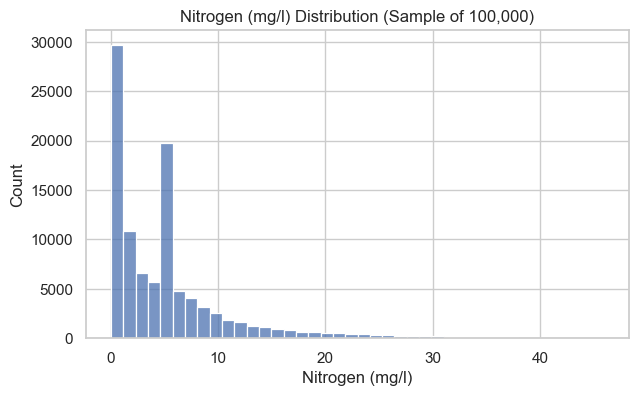

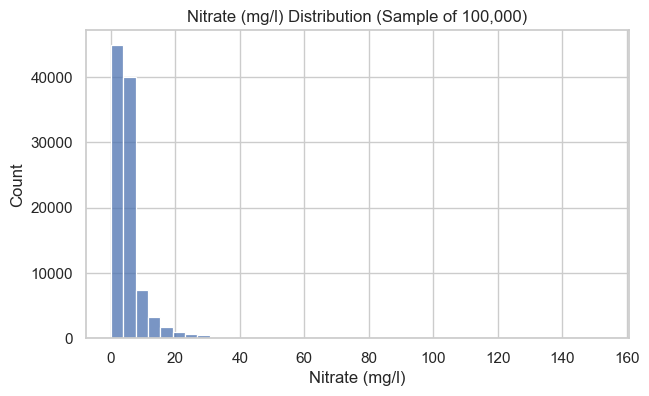

In [10]:
# ===========================================
# DATA STATISTICS (NO OVERLAP WITH visualization.py)
# ===========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set(style="whitegrid")

PLOT_SAMPLE_SIZE = 100_000  # Safe for large datasets


# --------------------------------------------------------
# 1️⃣ BASIC DATASET INFORMATION
# --------------------------------------------------------
def dataset_overview(df):
    print("===== DATASET OVERVIEW =====")
    print(f"Total Samples (rows): {df.shape[0]:,}")
    print(f"Total Features (columns): {df.shape[1]}")

    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    print(f"\nNumerical Features ({len(numerical_cols)}):")
    print(" - " + ", ".join(numerical_cols))

    print(f"\nCategorical Features ({len(categorical_cols)}):")
    print(" - " + ", ".join(categorical_cols))

    return numerical_cols, categorical_cols


# --------------------------------------------------------
# 2️⃣ DESCRIPTIVE STATISTICS (FAST)
# --------------------------------------------------------
def numerical_statistics(df, numerical_cols):
    print("\n===== NUMERICAL FEATURE STATISTICS =====")
    display(df[numerical_cols].describe().T)


# --------------------------------------------------------
# 3️⃣ MISSING VALUES (INSTANT)
# --------------------------------------------------------
def missing_values(df):
    print("\n===== MISSING VALUES SUMMARY =====")
    mv = df.isna().sum()
    mv_pct = (mv / len(df) * 100).round(2)
    mv_df = pd.DataFrame({"Missing Count": mv, "Missing %": mv_pct})
    display(mv_df.sort_values("Missing Count", ascending=False))


# --------------------------------------------------------
# 4️⃣ TARGET VARIABLE DISTRIBUTION (SIMPLE ONLY)
# --------------------------------------------------------
def target_statistics(df, target="CCME_Values"):
    print(f"\n===== TARGET VARIABLE SUMMARY: {target} =====")
    display(df[target].describe())

    df_plot = df[target].sample(min(PLOT_SAMPLE_SIZE, len(df)), random_state=42)

    plt.figure(figsize=(8,5))
    sns.histplot(df_plot, bins=40, kde=False)
    plt.title(f"Distribution of {target} (Sample of {len(df_plot):,})")
    plt.xlabel(target)
    plt.ylabel("Count")
    plt.show()


# --------------------------------------------------------
# 5️⃣ SIMPLE HISTOGRAMS OF NUMERICAL FEATURES
# (NO CORRELATIONS, NO PAIRPLOTS, NO DUPLICATION)
# --------------------------------------------------------
def numerical_histograms(df, numerical_cols):
    print("\n===== NUMERICAL FEATURE HISTOGRAMS =====")

    df_plot = df.sample(min(PLOT_SAMPLE_SIZE, len(df)), random_state=42)

    for col in numerical_cols:
        if col != "CCME_Values":
            plt.figure(figsize=(7,4))
            sns.histplot(df_plot[col], bins=40, kde=False)
            plt.title(f"{col} Distribution (Sample of {len(df_plot):,})")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.show()


# --------------------------------------------------------
# 🚀 MASTER FUNCTION
# --------------------------------------------------------
def run_data_statistics(df):
    numerical_cols, categorical_cols = dataset_overview(df)
    numerical_statistics(df, numerical_cols)
    missing_values(df)

    if "CCME_Values" in df.columns:
        target_statistics(df)

    # Safe, simple histograms (non-overlapping)
    numerical_histograms(df, numerical_cols)


# --------------------------------------------------------
# RUN
# --------------------------------------------------------
run_data_statistics(df)


**The dataset contains 2.8 million observations and 14 features, comprising 9 numerical (including CCME values column) and 5 categorical variables (including the CCME WQI column).**
No missing values were detected in any column, indicating that all records in the provided dataset are complete.


### Clean the Raw Data

In [3]:
# ==========================================
# Call the "Cleaning" function
# ==========================================

# --- Import the cleaning function from the cleaning script ---
from cleaning_rawdata import clean_raw_data

# --- Apply cleaning to the loaded DataFrame ---
df_clean = clean_raw_data(df)

# --- Check results ---
print(f"Cleaned dataset: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")
df_clean.head()
# To load the in memory "Cleaned_dataset.csv" later on, use: df_clean

# --– Save the cleaned dataset to disk ---
# print("Cleaned dataset saved as 'Cleaned_dataset.csv'")
# df_clean.to_csv("Cleaned_dataset.csv", index=False)
# To load the saved to disk "Cleaned_dataset.csv" later on, use:
# df_clean = pd.read_csv("Cleaned_dataset.csv")

Cleaned dataset: 2827977 rows × 24 columns


Country             Area Waterbody Type       Date  Ammonia (mg/l)  \
0  Canada  SE649035-145565          River 1974-01-12        0.059248   
1  Canada  SE649035-145565          River 1975-01-12        0.039821   
2  Canada  SE649035-145565          River 1976-01-12        0.031341   
3  Canada  SE649035-145565          River 1977-01-12        0.020501   
4  Canada  SE649035-145565          River 1978-01-12        0.020023   

   Biochemical Oxygen Demand (mg/l)  Dissolved Oxygen (mg/l)  \
0                              1.30                   8.1500   
1                              1.38                   7.8000   
2                              2.23                   7.8000   
3                              1.61                   8.1500   
4                              1.64                   4.3708   

   Orthophosphate (mg/l)  pH (ph units)  Temperature (cel)  ...  Year  Month  \
0               0.011917        8.07500              9.885  ...  1974      1   
1               0.009417        7.73333             10.150  ...  1975      1   
2               0.011000        7.46667             10.235  ...  1976      1   
3               0.012333        7.78333             11.116  ...  1977      1   
4               0.006182        7.10000              7.068  ...  1978      1   

   Day Date_Ordinal  Month_sin  Month_cos   Day_sin   Day_cos  Year_norm  \
0   12       720635        0.5   0.866025  0.651372 -0.758758   0.409639   
1   12       721000        0.5   0.866025  0.651372 -0.758758   0.421687   
2   12       721365        0.5   0.866025  0.651372 -0.758758   0.433735   
3   12       721731        0.5   0.866025  0.651372 -0.758758   0.445783   
4   12       722096        0.5   0.866025  0.651372 -0.758758   0.457831   

   Date_String  
0   12-01-1974  
1   12-01-1975  
2   12-01-1976  
3   12-01-1977  
4   12-01-1978  

[5 rows x 24 columns]

The `clean_raw_data(df)` function preprocesses the dataset by filling missing numeric values (i.e., imputing) with column means and categorical values with their most frequent entry, converting the `Date` column to proper datetime format, and extracting `Year`, `Month`, and `Day` components. It then adds time-based features including a linear time index (`Date_Ordinal`), cyclical encodings (`Month_sin`, `Month_cos`, `Day_sin`, `Day_cos`) to capture seasonality, a normalized year (`Year_norm`) to represent long-term trends, and a readable `Date_String` column. These operations expand the dataset from 14 to 24 columns (10 new ones) without losing rows, providing both linear and cyclic representations of time for improved temporal modeling.


### Run Model 1 to Predict CCME_Values (REGRESSION)

In [6]:
# ==========================================
# Run Model 1 (Predicting CCME_Values)
# ==========================================

df_sample = df_clean.sample(frac=0.1, random_state=42)

from run_model_1 import run_model_1
results_model1, best_model1, X_train, y_train, X_val, y_val, X_test, y_test = run_model_1(df_sample)


print("\n📊 Train/Validation Results (Model 1):")
print(results_model1)

🏗️ Running Model 1: Predicting 'CCME_Values' ...

🚫 Excluding features: ['CCME_WQI', 'Date_String']
🤖 Using Auto Encoding (adaptive to cardinality)...
✅ One-Hot Encoding applied to: ['Country', 'Waterbody Type']
✅ Label Encoding applied to: ['Area']
⚖️ Applying StandardScaler (mean=0, std=1)...
🔍 Using quantile-based stratification for regression target.

✅ Data successfully preprocessed and split:
  Training set:   203614 samples
  Validation set: 22624 samples
  Test set:       56560 samples
  Total features: 35 columns

📋 Feature and Target Summary
Target: CCME_Values
Features (35 total): Area, Ammonia (mg/l), Biochemical Oxygen Demand (mg/l), Dissolved Oxygen (mg/l), Orthophosphate (mg/l), pH (ph units), Temperature (cel), Nitrogen (mg/l), Nitrate (mg/l), Year, Month, Day, Date_Ordinal, Month_sin, Month_cos, Day_sin, Day_cos, Year_norm, Country_Canada, Country_China, Country_England, Country_Ireland, Country_USA, Waterbody Type_Bay, Waterbody Type_Canal, Waterbody Type_Coastal, Wat

To prevent overfitting, models were first filtered using their generalization gap, defined as the difference between training and validation RMSE. A model was considered acceptable only if its gap was below twice the median gap across all candidates, a robust threshold that automatically adapts to the error scale and avoids penalizing certain model families unfairly. This method provides a simple, statistically stable way to discard severely overfitting models before selecting the best model based on validation RMSE. Among the remaining well-generalized models, the one with the lowest validation RMSE is selected as the final best model.

Epoch 1/40 - Train RMSE: 9.2278, Val RMSE: 9.2707
Epoch 2/40 - Train RMSE: 6.8910, Val RMSE: 6.9081
Epoch 3/40 - Train RMSE: 5.7834, Val RMSE: 5.8040
Epoch 4/40 - Train RMSE: 5.5648, Val RMSE: 5.5753
Epoch 5/40 - Train RMSE: 5.1085, Val RMSE: 5.1062
Epoch 6/40 - Train RMSE: 3.7196, Val RMSE: 3.7039
Epoch 7/40 - Train RMSE: 4.2722, Val RMSE: 4.2580
Epoch 8/40 - Train RMSE: 4.0544, Val RMSE: 4.0392
Epoch 9/40 - Train RMSE: 4.1916, Val RMSE: 4.1762
Epoch 10/40 - Train RMSE: 3.4142, Val RMSE: 3.3992
Epoch 11/40 - Train RMSE: 2.9213, Val RMSE: 2.9095
Epoch 12/40 - Train RMSE: 4.0740, Val RMSE: 4.0570
Epoch 13/40 - Train RMSE: 3.6670, Val RMSE: 3.6515
Epoch 14/40 - Train RMSE: 2.7637, Val RMSE: 2.7504
Epoch 15/40 - Train RMSE: 3.0307, Val RMSE: 3.0180
Epoch 16/40 - Train RMSE: 4.0217, Val RMSE: 4.0070
Epoch 17/40 - Train RMSE: 3.3153, Val RMSE: 3.3006
Epoch 18/40 - Train RMSE: 2.9463, Val RMSE: 2.9336
Epoch 19/40 - Train RMSE: 2.7587, Val RMSE: 2.7492
Epoch 20/40 - Train RMSE: 2.5090, Val RM

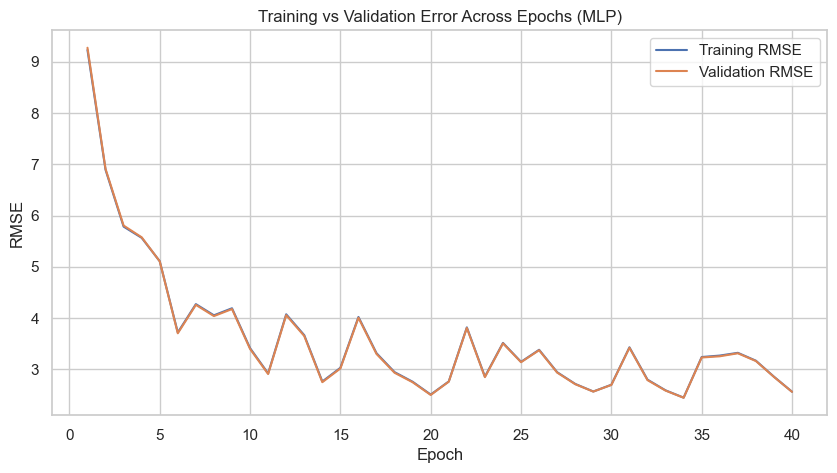

In [7]:
# ==========================================
# Learning Curve (Training vs Validation Error)
# ==========================================

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epochs = 40   # you can adjust
hidden_layers = (64, 32)

train_errors = []
val_errors = []

# Initialize MLP with warm_start=True so we can train epoch-by-epoch
mlp = MLPRegressor(
    hidden_layer_sizes=hidden_layers,
    learning_rate_init=0.001,
    max_iter=1,             # 1 epoch at a time
    warm_start=True,        # keep weights between epochs
    random_state=42
)

for epoch in range(epochs):
    mlp.fit(X_train, y_train)

    # Predictions
    train_pred = mlp.predict(X_train)
    val_pred = mlp.predict(X_val)

    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    val_rmse   = np.sqrt(mean_squared_error(y_val, val_pred))

    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

    print(f"Epoch {epoch+1}/{epochs} - Train RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}")

# ===== Plot Learning Curves =====
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), train_errors, label="Training RMSE")
plt.plot(range(1, epochs+1), val_errors, label="Validation RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Training vs Validation Error Across Epochs (MLP)")
plt.legend()
plt.grid(True)
plt.show()


Training error can be higher than validation error — especially in MLP (Because MLP trains in batches, the training error fluctuates more + with just a subset of the data, randomness can make validation easier.).
MLP was used because only neural networks train in epochs since RF cannot produce epoch-based learning curves.

In [8]:
# ==========================================
# Hyperparameter Tuning of Model 1
# Selects top-2 models based on ACCURACY-FIRST logic 
# (Val RMSE + acceptable generalization gap)
# ==========================================

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# -------------------------------
# Step A — Apply same selection logic as Model 1
# -------------------------------

# Compute generalization gap median threshold
median_gap = results_model1["Gap (RMSE)"].median()
max_allowed_gap = 2 * median_gap

# Filter out overfitting models
eligible = results_model1[results_model1["Gap (RMSE)"] <= max_allowed_gap]

# If everything overfits, keep them all
if eligible.empty:
    print("⚠ All models overfit — tuning all models.")
    eligible = results_model1.copy()

# Select TOP-2 models based on lowest Val RMSE among eligible models
top2 = eligible.sort_values("Val RMSE").head(2)

print("\n🔎 Models selected for hyperparameter tuning (Gap-filtered):")
print(top2[["Model", "Val RMSE", "Gap (RMSE)"]])

# -------------------------------
# Step B — Re-create original model objects
# -------------------------------

model_library = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500)
}

# -------------------------------
# Step C — Hyperparameter grids
# -------------------------------

param_grids = {
    "Random Forest": {
        "n_estimators": [200, 300, 400],
        "max_depth": [10, 20, 30, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2", 0.5],
        "bootstrap": [True, False]
    },
    "XGBoost": {
        "n_estimators": [200, 300, 400],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7, 9],
        "subsample": [0.5, 0.7, 0.9, 1.0],
        "colsample_bytree": [0.5, 0.7, 0.9, 1.0],
        "min_child_weight": [1, 3, 5, 7],
        "gamma": [0, 1, 5, 10],
        "reg_lambda": [0, 1, 5, 10],
        "reg_alpha": [0, 0.1, 0.5, 1]
    },
    "MLP Regressor": {
        "hidden_layer_sizes": [(64, 32), (128, 64), (256, 128)],
        "alpha": [0.0001, 0.001, 0.01, 0.1],
        "learning_rate_init": [0.0005, 0.001, 0.005],
        "early_stopping": [True]
    },
    "Decision Tree": {
        "max_depth": [5, 10, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}

# -------------------------------
# Step D — Tune only the selected top-2 models
# -------------------------------

tuned_models = {}
tuning_results = []

for _, row in top2.iterrows():
    model_name = row["Model"]
    print(f"\n🔧 Tuning hyperparameters for: {model_name}")

    if model_name not in param_grids:
        print(f"⚠ No hyperparameters defined for: {model_name}. Skipping.")
        continue

    model = model_library[model_name]
    param_grid = param_grids[model_name]

    tuner = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=25,
        scoring="neg_root_mean_squared_error",
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    tuner.fit(X_train, y_train)

    best_model = tuner.best_estimator_
    tuned_models[model_name] = best_model

    val_pred = best_model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    val_mae = mean_absolute_error(y_val, val_pred)
    val_r2 = r2_score(y_val, val_pred)

    tuning_results.append({
        "Model": model_name,
        "Best Params": tuner.best_params_,
        "Tuned Val RMSE": val_rmse,
        "Tuned Val MAE": val_mae,
        "Tuned Val R²": val_r2
    })

tuning_results_df = pd.DataFrame(tuning_results).sort_values("Tuned Val RMSE")

print("\n🎯 Final Hyperparameter Tuning Results:")
print(tuning_results_df.to_string(index=False))


🔎 Models selected for hyperparameter tuning (Gap-filtered):
           Model  Val RMSE  Gap (RMSE)
0  Random Forest  0.268999    0.160298
2        XGBoost  0.541445    0.058123

🔧 Tuning hyperparameters for: Random Forest
Fitting 3 folds for each of 25 candidates, totalling 75 fits

🔧 Tuning hyperparameters for: XGBoost
Fitting 3 folds for each of 25 candidates, totalling 75 fits

🎯 Final Hyperparameter Tuning Results:
        Model                                                                                                                                                                 Best Params  Tuned Val RMSE  Tuned Val MAE  Tuned Val R²
Random Forest                                              {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 20, 'bootstrap': False}        0.263174       0.062537      0.999778
      XGBoost {'subsample': 0.9, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 400, 'min_child_weight': 7, 'max

**Comparison of Tuned vs Untuned Models**

Hyperparameter tuning introduced stronger regularization to both Random Forest and XGBoost, producing more stable and generalizable models.  
RMSE did not change a lot upon tuning (default models were already strong).


🔎 Default vs Tuned Model Comparison:
            Model  Val RMSE  Val MAE   Val R²    Type                                                                                                                                                                 Best Params
    Random Forest  0.263174 0.062537 0.999778   Tuned                                              {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 20, 'bootstrap': False}
    Random Forest  0.268999 0.041349 0.999768 Default                                                                                                                                                                   Not tuned
    Decision Tree  0.351806 0.058118 0.999603 Default                                                                                                                                                                   Not tuned
          XGBoost  0.541445 0.172202 0.999059 Default     

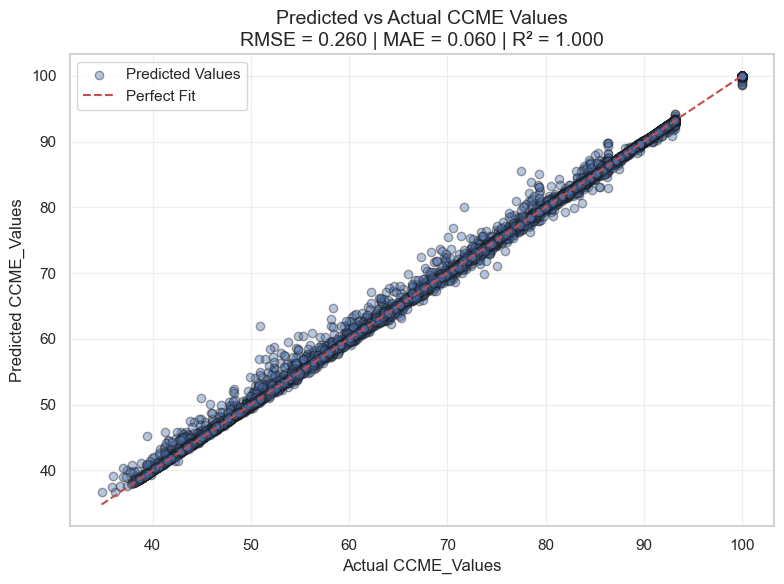


📈 Plotting Predicted CCME vs Key Input Features...


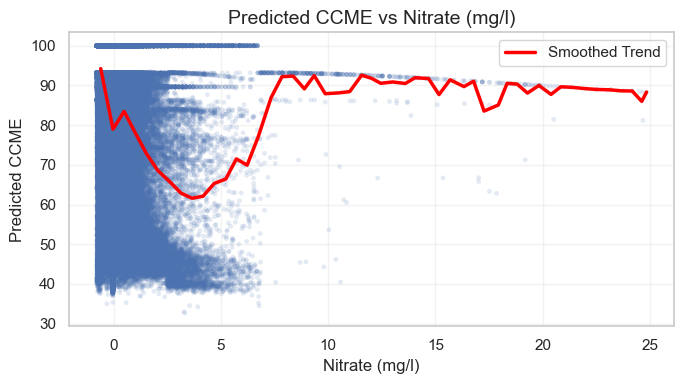

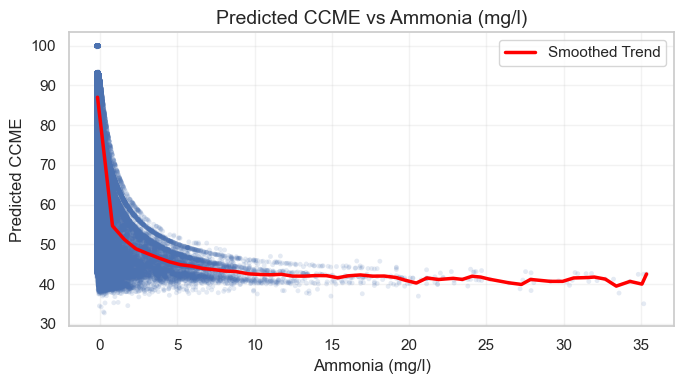

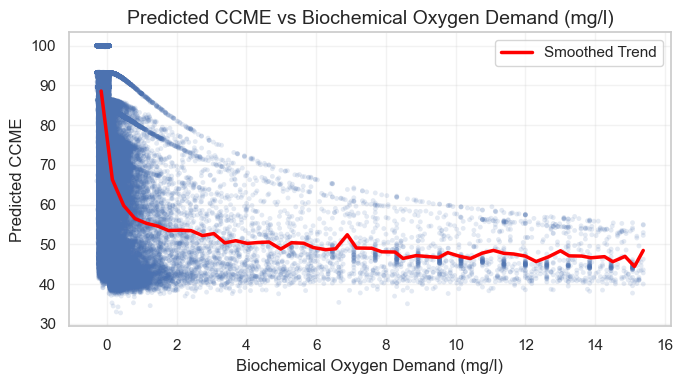

In [9]:
# ==========================================
# Final Model Selection & Test Evaluation (Model 1)
# ==========================================

# 🔎 Compare tuned vs untuned models

# Extract default model performance
default_results = results_model1.copy()
default_results = default_results[["Model", "Val RMSE", "Val MAE", "Val R²"]]
default_results["Type"] = "Default"

# Extract tuned model performance
tuned_results = tuning_results_df.copy()
tuned_results.rename(columns={
    "Tuned Val RMSE": "Val RMSE",
    "Tuned Val MAE": "Val MAE",
    "Tuned Val R²": "Val R²"
}, inplace=True)
tuned_results["Type"] = "Tuned"

# ==========================================
# FIX: Replace NaN with "Not tuned"
# ==========================================

# For default models → they were never tuned
default_results["Best Params"] = "Not tuned"

# For tuned models → keep tuner params, fill NaN for any missing
tuned_results["Best Params"] = tuned_results["Best Params"].apply(
    lambda x: x if isinstance(x, dict) else "Not tuned"
)

# Combine for comparison
combined = pd.concat([default_results, tuned_results], ignore_index=True)

print("\n🔎 Default vs Tuned Model Comparison:")
print(combined.sort_values("Val RMSE").to_string(index=False))

# 🏆 Select best model overall
# Apply generalization gap filter for fair final selection
median_gap = results_model1["Gap (RMSE)"].median()
max_allowed_gap = 2 * median_gap

# Only keep default models that passed gap filtering
eligible_default = results_model1[results_model1["Gap (RMSE)"] <= max_allowed_gap]
eligible_default = eligible_default[["Model", "Val RMSE", "Val MAE", "Val R²"]]
eligible_default["Type"] = "Default"

# Tuned models are ALWAYS gap-safe (they were pre-filtered)
eligible_tuned = tuned_results.copy()

# Combine eligible models ONLY
eligible_combined = pd.concat([eligible_default, eligible_tuned], ignore_index=True)

# Pick model with lowest VAL RMSE
best_overall = eligible_combined.loc[eligible_combined["Val RMSE"].idxmin()]
best_model_name = best_overall["Model"]
model_type = best_overall["Type"]

best_model_name = best_overall["Model"]
model_type = best_overall["Type"]

print(f"\n🏆 Best Overall Model: {best_model_name} ({model_type})")
print(f"   Validation RMSE = {best_overall['Val RMSE']:.4f}")

# Select model object
if model_type == "Tuned":
    best_final_model = tuned_models[best_model_name]
else:
    best_final_model = model_library[best_model_name]

# ==========================================
# 🔁 Retrain final model on Train + Validation
# ==========================================
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

best_final_model.fit(X_train_full, y_train_full)

# ==========================================
# 🚨 FIRST AND ONLY TIME WE TOUCH THE TEST SET
# ==========================================
test_pred = best_final_model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_mae = mean_absolute_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("\n📌 FINAL TEST SET PERFORMANCE:")
print(f"   Test RMSE = {test_rmse:.4f}")
print(f"   Test MAE  = {test_mae:.4f}")
print(f"   Test R²   = {test_r2:.4f}")

# Save results
final_test_metrics = {
    "Model": best_model_name,
    "Type": model_type,
    "Test RMSE": test_rmse,
    "Test MAE": test_mae,
    "Test R²": test_r2
}

final_test_metrics


# ==========================================
# 📊 Actual vs Predicted CCME Values Plot (works only when the whole notebook is ran)
# ==========================================

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, test_pred, alpha=0.4, edgecolor='k', label="Predicted Values")

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    label="Perfect Fit"
)

# Labels and title
plt.xlabel("Actual CCME_Values", fontsize=12)
plt.ylabel("Predicted CCME_Values", fontsize=12)
plt.title(
    f"Predicted vs Actual CCME Values\n"
    f"RMSE = {test_rmse:.3f} | MAE = {test_mae:.3f} | R² = {test_r2:.3f}",
    fontsize=14
)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# ==========================================================
# 📈 Predicted CCME vs Individual Input Features (No statsmodels)
# ==========================================================
print("\n📈 Plotting Predicted CCME vs Key Input Features...")

important_features = [
    "Nitrate (mg/l)",
    "Ammonia (mg/l)",
    "Biochemical Oxygen Demand (mg/l)"
]

# Predict on full training data — cleaner plots than test set
y_pred_full = best_final_model.predict(X_train_full)

for f in important_features:
    if f not in X_train_full.columns:
        print(f"⚠ Skipping {f} — not found in dataset.")
        continue

    # Build a dataframe for plotting
    df_plot = pd.DataFrame({
        "x": X_train_full[f],
        "y": y_pred_full
    }).sort_values("x")

    plt.figure(figsize=(7, 4))

    # Scatterplot (transparent)
    plt.scatter(df_plot["x"], df_plot["y"], alpha=0.15, s=12, edgecolor='none')

    # ========== Robust Nonparametric Trend Line (No statsmodels) ==========
    # Create 50 equally spaced bins for smoothing
    bins = np.linspace(df_plot["x"].min(), df_plot["x"].max(), 50)
    df_plot["bin"] = np.digitize(df_plot["x"], bins)

    # Compute mean predicted CCME per bin
    bin_means = df_plot.groupby("bin")[["x", "y"]].mean()

    # Plot trend line
    plt.plot(bin_means["x"], bin_means["y"],
             color="red", linewidth=2.5, label="Smoothed Trend")

    # ===========================================================================
    plt.xlabel(f, fontsize=12)
    plt.ylabel("Predicted CCME", fontsize=12)
    plt.title(f"Predicted CCME vs {f}", fontsize=14)
    plt.legend()
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()


The actual vs predicted CCME plot shows that the Random Forest model achieves near-perfect alignment with ground-truth values (R² ≈ 1), confirming excellent predictive accuracy and generalization across diverse water-quality conditions.

The predicted CCME vs input-feature plots reveal realistic nonlinear ecological relationships, where increases in nitrate, ammonia, and BOD generally correspond to declining water-quality predictions, consistent with known pollutant behavior.

--> Together, these visualizations demonstrate that the model not only predicts CCME values accurately but also captures meaningful pollutant–response patterns, indicating reliable interpretability and environmental relevance.

### Run Model 2 to Predict CCME_WQI (CLASSIFICATION)

🏗️ Running Model 2: Predicting 'CCME_WQI' ...

🚫 Excluding features: ['CCME_Values', 'Date_String']
🤖 Using Auto Encoding (adaptive to cardinality)...
✅ One-Hot Encoding applied to: ['Country', 'Waterbody Type']
✅ Label Encoding applied to: ['Area']
⚖️ Applying StandardScaler (mean=0, std=1)...
🔍 Using stratification for classification target.

✅ Data successfully preprocessed and split:
  Training set:   203614 samples
  Validation set: 22624 samples
  Test set:       56560 samples
  Total features: 35 columns

📋 Feature Summary
Features (35): Area, Ammonia (mg/l), Biochemical Oxygen Demand (mg/l), Dissolved Oxygen (mg/l), Orthophosphate (mg/l), pH (ph units), Temperature (cel), Nitrogen (mg/l), Nitrate (mg/l), Year, Month, Day, Date_Ordinal, Month_sin, Month_cos, Day_sin, Day_cos, Year_norm, Country_Canada, Country_China, Country_England, Country_Ireland, Country_USA, Waterbody Type_Bay, Waterbody Type_Canal, Waterbody Type_Coastal, Waterbody Type_Drainage, Waterbody Type_Effluent, W

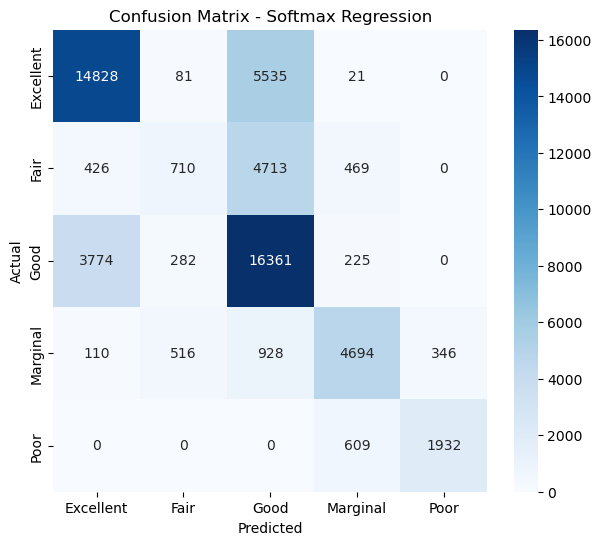


📄 Classification Report:

              precision    recall  f1-score   support

   Excellent       0.77      0.72      0.75     20465
        Fair       0.45      0.11      0.18      6318
        Good       0.59      0.79      0.68     20642
    Marginal       0.78      0.71      0.74      6594
        Poor       0.85      0.76      0.80      2541

    accuracy                           0.68     56560
   macro avg       0.69      0.62      0.63     56560
weighted avg       0.68      0.68      0.66     56560



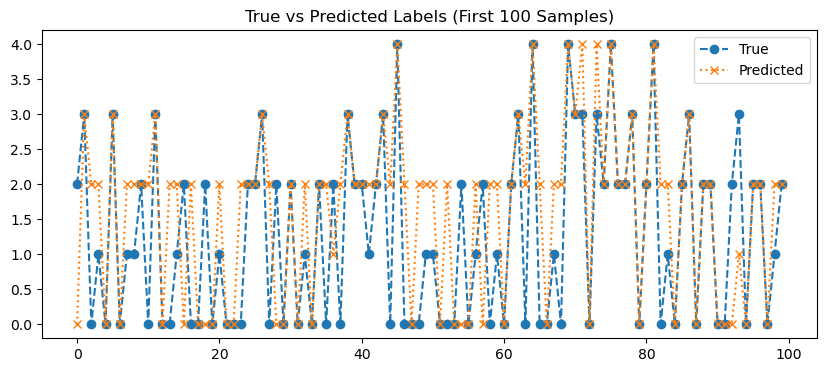


📊 Summary Table:
             Model  Train Accuracy  Train Precision  Train Recall  Train F1 Weighted  Train F1 Macro  Validation Accuracy  Validation Precision  Validation Recall  Validation F1 Weighted  Validation F1 Macro  Test Accuracy  Test Precision  Test Recall  Test F1 Weighted  Test F1 Macro  Test MAE  Test RMSE  Test R2  Train Time (s)
Softmax Regression        0.674679          0.67309      0.674679           0.651166        0.617007             0.679323              0.676314           0.679323                0.655556             0.621733       0.681135        0.676129     0.681135          0.661684       0.630758  0.505499   0.939893 0.394832           39.88

📊 Softmax Regression Results Summary:
                Model  Train Accuracy  Train Precision  Train Recall  \
0  Softmax Regression        0.674679          0.67309      0.674679   

   Train F1 Weighted  Train F1 Macro  Validation Accuracy  \
0           0.651166        0.617007             0.679323   

   Validation

In [4]:
# ==========================================
# Run Model 2 (Predicting CCME_WQI), without tuning
# ==========================================

import importlib
import run_model_2_softmax_regression
import preprocessing_utils

importlib.reload(preprocessing_utils)
importlib.reload(run_model_2_softmax_regression)

from run_model_2_softmax_regression import run_softmax_model

# Use only 10% of the data for a quick test

df_sample = df_clean.sample(frac=0.10, random_state=42)
results_df, model = run_softmax_model(df_sample)


# === 4️⃣ Display results summary ===
print("\n📊 Softmax Regression Results Summary:")
print(results_df)

In [11]:
# Run Model 2 (predicting CCME_WQI with Hyperparameter Tuning)

import importlib
import preprocessing_utils
import model_2_tuning

importlib.reload(preprocessing_utils)
importlib.reload(model_2_tuning)

from model_2_tuning import run_softmax_model

# Use sample for fast testing
df_sample = df_clean.sample(frac=0.10, random_state=42)
results_df, model, tuning_results = run_softmax_model(df_sample)

# Full run
# results_df, model, tuning_results = run_softmax_model(df_clean)

# === Display Summary ===
print("\n📊 Softmax Regression – Train / Val / Test Metrics:")
print(results_df)

🏗️ Running Tuned Softmax (SGD) with Full Evaluation ...

🚫 Excluding features: ['CCME_Values', 'Date_String']
🤖 Using Auto Encoding (adaptive to cardinality)...
✅ One-Hot Encoding applied to: ['Country', 'Waterbody Type']
✅ Label Encoding applied to: ['Area']
🔍 Using stratification for classification target.

✅ Data successfully preprocessed and split:
  Training set:   203614 samples
  Validation set: 22624 samples
  Test set:       56560 samples
  Total features: 35 columns
Detected classes: ['Excellent', 'Fair', 'Good', 'Marginal', 'Poor']

🧮 Using 20361 samples (~10.0%) for tuning.

🔍 Performing hyperparameter search...

Fitting 3 folds for each of 35 candidates, totalling 105 fits

✅ Tuning completed in 248.69 sec
🏆 Best Params:
   clf__alpha: 6.025215736203855e-07
   clf__class_weight: None
   clf__eta0: 0.008288916866885139
   clf__l1_ratio: 0.0
   clf__learning_rate: adaptive
   clf__max_iter: 1985
   clf__penalty: l2

🔹 Training best model on full training set...

📊 Train / Va

In [12]:
#Extract Full Metrics for All Datasets of Model 2

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)

# Prepare datasets
X_train, X_val, X_test, y_train, y_val, y_test = preprocessing_utils.preprocess_data(
    df_clean,
    target_column="CCME_WQI",
    encoding="auto",
    scale=False,
    scaling_method="standard",
    drop_first=False,
    random_state=42,
    exclude_features=["CCME_Values", "Date_String"]
)

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(pd.concat([y_train, y_val, y_test]).astype(str))

y_train_enc = le.transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

# Function to compute metrics
def compute_metrics(model, X, y, dataset_name):
    y_pred = model.predict(X)
    return {
        "dataset": dataset_name,
        "accuracy": accuracy_score(y, y_pred),
        "precision": precision_score(y, y_pred, average="weighted"),
        "recall": recall_score(y, y_pred, average="weighted"),
        "f1_weighted": f1_score(y, y_pred, average="weighted"),
        "f1_macro": f1_score(y, y_pred, average="macro"),
        "mae": mean_absolute_error(y, y_pred),
        "rmse": np.sqrt(mean_squared_error(y, y_pred)),
        "r2": r2_score(y, y_pred)
    }

# Compute metrics for all datasets
train_metrics = compute_metrics(model, X_train, y_train_enc, "train")
val_metrics   = compute_metrics(model, X_val, y_val_enc, "validation")
test_metrics  = compute_metrics(model, X_test, y_test_enc, "test")

# Create summary DataFrame
import pandas as pd
summary_metrics = pd.DataFrame([train_metrics, val_metrics, test_metrics])

# Display all metrics
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)
print("\n📊 Train / Validation / Test Metrics (All Metrics):")
print(summary_metrics)

🚫 Excluding features: ['CCME_Values', 'Date_String']
🤖 Using Auto Encoding (adaptive to cardinality)...
✅ One-Hot Encoding applied to: ['Country', 'Waterbody Type']
✅ Label Encoding applied to: ['Area']
🔍 Using stratification for classification target.

✅ Data successfully preprocessed and split:
  Training set:   2036142 samples
  Validation set: 226239 samples
  Test set:       565596 samples
  Total features: 35 columns

📊 Train / Validation / Test Metrics (All Metrics):
      dataset  accuracy  precision  recall  f1_weighted  f1_macro     mae  \
0       train    0.8197     0.8016  0.8197       0.7942    0.7187  0.2504   
1  validation    0.8197     0.8016  0.8197       0.7942    0.7188  0.2504   
2        test    0.8186     0.7999  0.8186       0.7929    0.7174  0.2522   

     rmse      r2  
0  0.6251  0.7319  
1  0.6250  0.7320  
2  0.6275  0.7298  


### Run Model 3 to Predict Other Parameters (REGRESSION)

🚫 Excluding features: ['CCME_Values', 'CCME_WQI', 'Date_String']
🤖 Using Auto Encoding (adaptive to cardinality)...
✅ One-Hot Encoding applied to: ['Country', 'Waterbody Type']
✅ Label Encoding applied to: ['Area']
⚖️ Applying StandardScaler (mean=0, std=1)...
🔍 Using quantile-based stratification for regression target.

✅ Data successfully preprocessed and split:
  Training set:   203614 samples
  Validation set: 22624 samples
  Test set:       56560 samples
  Total features: 32 columns
🚫 Excluding features: ['CCME_Values', 'CCME_WQI', 'Date_String']
🤖 Using Auto Encoding (adaptive to cardinality)...
✅ One-Hot Encoding applied to: ['Country', 'Waterbody Type']
✅ Label Encoding applied to: ['Area']
⚖️ Applying StandardScaler (mean=0, std=1)...
🔍 Using quantile-based stratification for regression target.

✅ Data successfully preprocessed and split:
  Training set:   203614 samples
  Validation set: 22624 samples
  Test set:       56560 samples
  Total features: 32 columns
🚫 Excluding fe

Parameters:   0%|          | 0/8 [00:00<?, ?it/s]


🔹 Predicting: Ammonia (mg/l)
Training Linear Regression ...
Training Random Forest ...
Training Extra Trees ...
Training XGBoost ...


Target              Model  MAE_val  RMSE_val  R2_val  \
0  Ammonia (mg/l)            XGBoost   1.0061    4.1872  0.3997   
1  Ammonia (mg/l)        Extra Trees   1.0376    4.2094  0.3932   
2  Ammonia (mg/l)      Random Forest   1.0105    4.2942  0.3686   
3  Ammonia (mg/l)  Linear Regression   1.3583    4.6649  0.2548   

   Train Time (s)  
0            0.28  
1            6.97  
2           16.98  
3            0.14


✅ Test Metrics for Ammonia (mg/l) using XGBoost:
R²: 0.414 | RMSE: 4.075 | MAE: 1.016


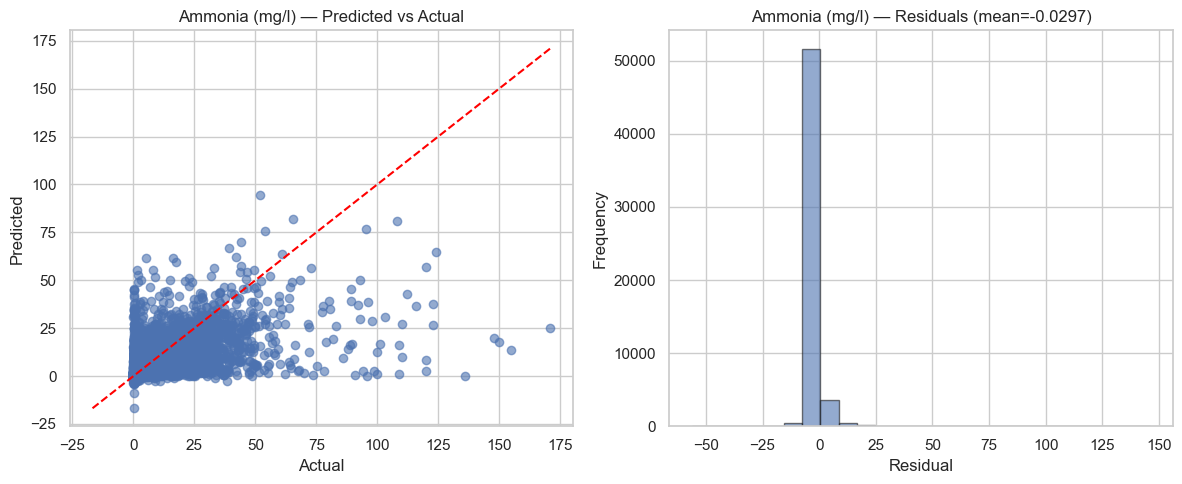


🔹 Predicting: Biochemical Oxygen Demand (mg/l)
Training Linear Regression ...
Training Random Forest ...
Training Extra Trees ...
Training XGBoost ...


Target              Model  MAE_val  RMSE_val  \
0  Biochemical Oxygen Demand (mg/l)      Random Forest   2.8826   11.4270   
1  Biochemical Oxygen Demand (mg/l)            XGBoost   2.7366   11.5659   
2  Biochemical Oxygen Demand (mg/l)        Extra Trees   2.9325   11.6700   
3  Biochemical Oxygen Demand (mg/l)  Linear Regression   3.1638   12.9024   

   R2_val  Train Time (s)  
0  0.5138           18.07  
1  0.5019            0.28  
2  0.4929            6.07  
3  0.3801            0.10


✅ Test Metrics for Biochemical Oxygen Demand (mg/l) using Random Forest:
R²: 0.434 | RMSE: 12.170 | MAE: 2.935


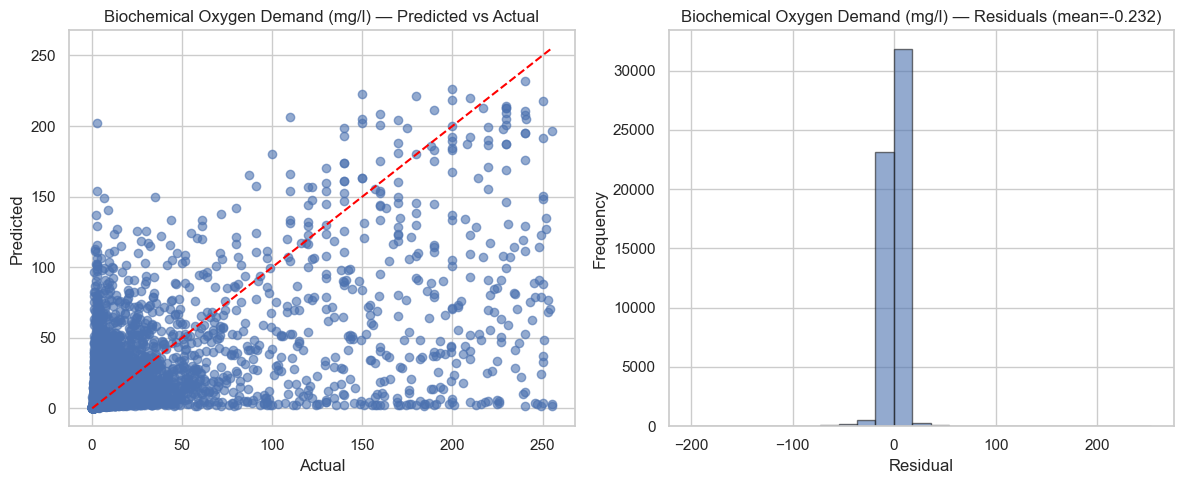


🔹 Predicting: Dissolved Oxygen (mg/l)
Training Linear Regression ...
Training Random Forest ...
Training Extra Trees ...
Training XGBoost ...


Target              Model  MAE_val  RMSE_val  R2_val  \
0  Dissolved Oxygen (mg/l)            XGBoost   0.9983    1.6028  0.2513   
1  Dissolved Oxygen (mg/l)      Random Forest   0.9942    1.6173  0.2377   
2  Dissolved Oxygen (mg/l)        Extra Trees   1.0133    1.6545  0.2022   
3  Dissolved Oxygen (mg/l)  Linear Regression   1.1271    1.7242  0.1335   

   Train Time (s)  
0            0.29  
1           13.97  
2            5.73  
3            0.11


✅ Test Metrics for Dissolved Oxygen (mg/l) using XGBoost:
R²: 0.263 | RMSE: 1.578 | MAE: 0.984


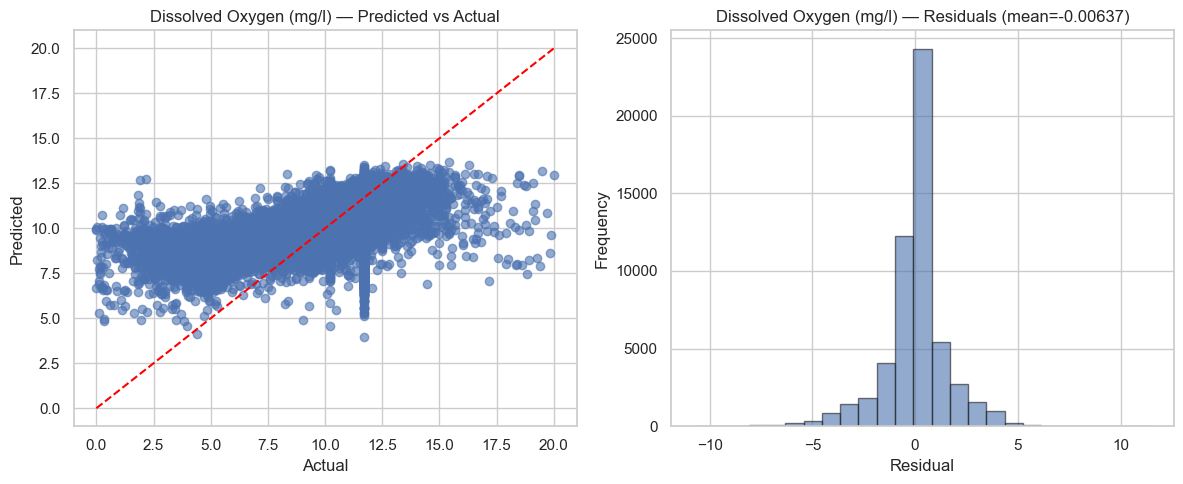


🔹 Predicting: Orthophosphate (mg/l)
Training Linear Regression ...
Training Random Forest ...
Training Extra Trees ...
Training XGBoost ...


Target              Model  MAE_val  RMSE_val  R2_val  \
0  Orthophosphate (mg/l)        Extra Trees   0.4406    1.4212  0.5328   
1  Orthophosphate (mg/l)      Random Forest   0.4370    1.4336  0.5246   
2  Orthophosphate (mg/l)            XGBoost   0.4431    1.4344  0.5241   
3  Orthophosphate (mg/l)  Linear Regression   0.7417    1.6363  0.3807   

   Train Time (s)  
0            6.81  
1           15.88  
2            0.27  
3            0.14


✅ Test Metrics for Orthophosphate (mg/l) using Extra Trees:
R²: 0.492 | RMSE: 1.499 | MAE: 0.453


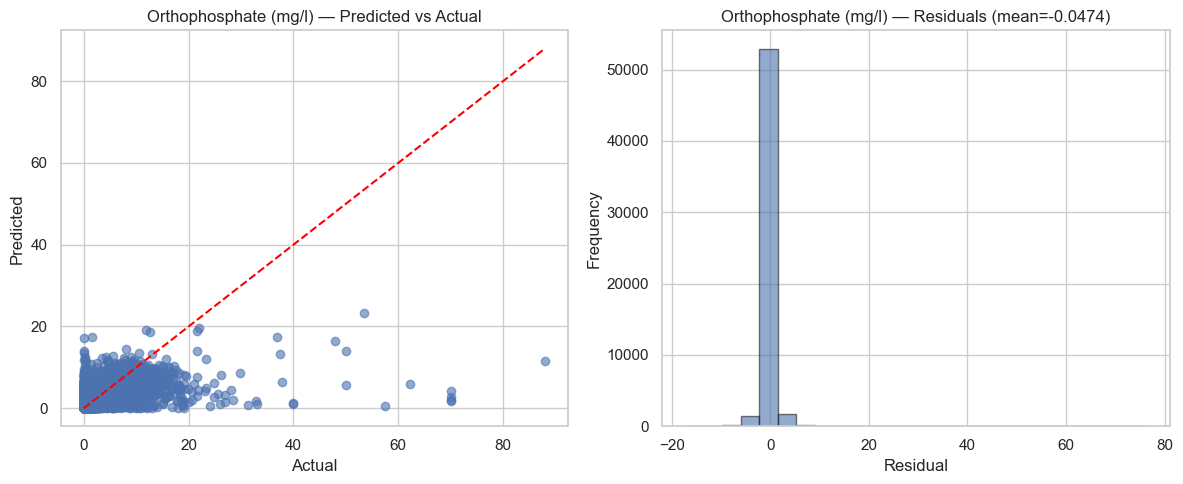


🔹 Predicting: pH (ph units)
Training Linear Regression ...
Training Random Forest ...
Training Extra Trees ...
Training XGBoost ...


Target              Model  MAE_val  RMSE_val  R2_val  Train Time (s)
0  pH (ph units)      Random Forest   0.2594    0.4106  0.2573           14.82
1  pH (ph units)            XGBoost   0.2646    0.4118  0.2530            0.29
2  pH (ph units)        Extra Trees   0.2630    0.4144  0.2436            6.63
3  pH (ph units)  Linear Regression   0.2968    0.4624  0.0581            0.12


✅ Test Metrics for pH (ph units) using Random Forest:
R²: 0.361 | RMSE: 0.403 | MAE: 0.260


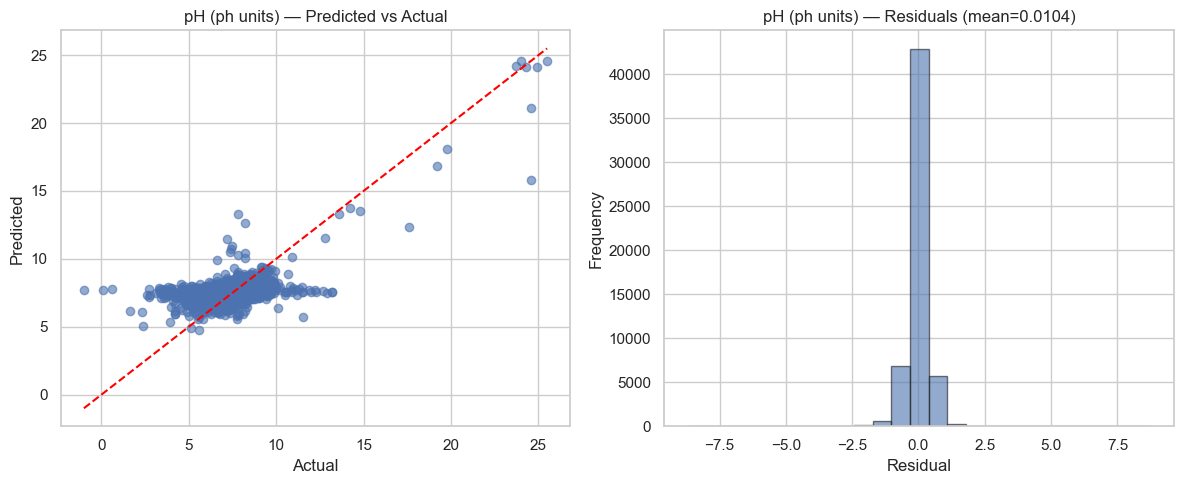


🔹 Predicting: Temperature (cel)
Training Linear Regression ...
Training Random Forest ...
Training Extra Trees ...
Training XGBoost ...


Target              Model  MAE_val  RMSE_val  R2_val  \
0  Temperature (cel)        Extra Trees   1.6755    2.9029  0.6725   
1  Temperature (cel)            XGBoost   1.8644    2.9300  0.6663   
2  Temperature (cel)      Random Forest   1.6993    2.9995  0.6503   
3  Temperature (cel)  Linear Regression   2.3697    3.9111  0.4055   

   Train Time (s)  
0            6.09  
1            0.28  
2           13.99  
3            0.11


✅ Test Metrics for Temperature (cel) using Extra Trees:
R²: 0.716 | RMSE: 2.727 | MAE: 1.629


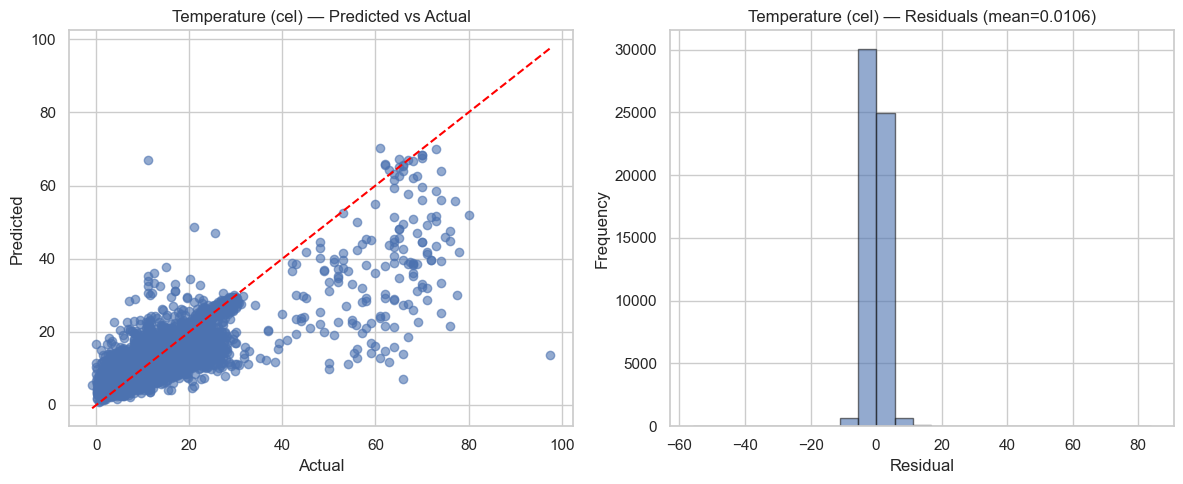


🔹 Predicting: Nitrogen (mg/l)
Training Linear Regression ...
Training Random Forest ...
Training Extra Trees ...
Training XGBoost ...


Target              Model  MAE_val  RMSE_val  R2_val  \
0  Nitrogen (mg/l)        Extra Trees   0.8549    2.5590  0.8263   
1  Nitrogen (mg/l)      Random Forest   0.8329    2.5690  0.8250   
2  Nitrogen (mg/l)            XGBoost   0.9829    2.6105  0.8193   
3  Nitrogen (mg/l)  Linear Regression   2.3804    4.1151  0.5509   

   Train Time (s)  
0            5.92  
1           14.22  
2            0.29  
3            0.10


✅ Test Metrics for Nitrogen (mg/l) using Extra Trees:
R²: 0.812 | RMSE: 2.675 | MAE: 0.884


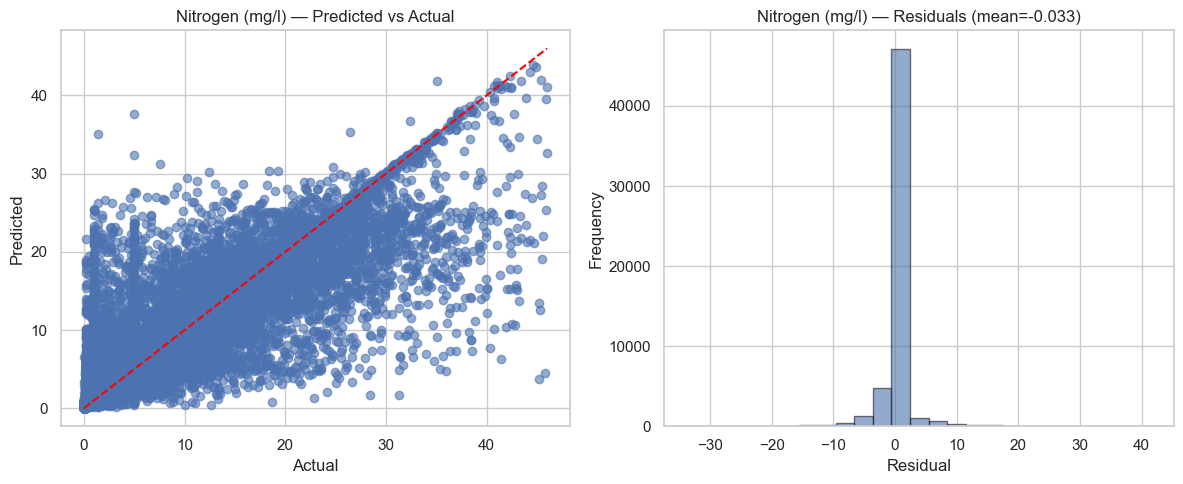


🔹 Predicting: Nitrate (mg/l)
Training Linear Regression ...
Training Random Forest ...
Training Extra Trees ...
Training XGBoost ...


Target              Model  MAE_val  RMSE_val  R2_val  \
0  Nitrate (mg/l)            XGBoost   1.4996    3.8900  0.5231   
1  Nitrate (mg/l)      Random Forest   1.3760    3.9282  0.5137   
2  Nitrate (mg/l)        Extra Trees   1.4488    4.0397  0.4857   
3  Nitrate (mg/l)  Linear Regression   2.2241    4.5723  0.3411   

   Train Time (s)  
0            0.28  
1           13.49  
2            5.67  
3            0.10


✅ Test Metrics for Nitrate (mg/l) using XGBoost:
R²: 0.467 | RMSE: 4.371 | MAE: 1.536


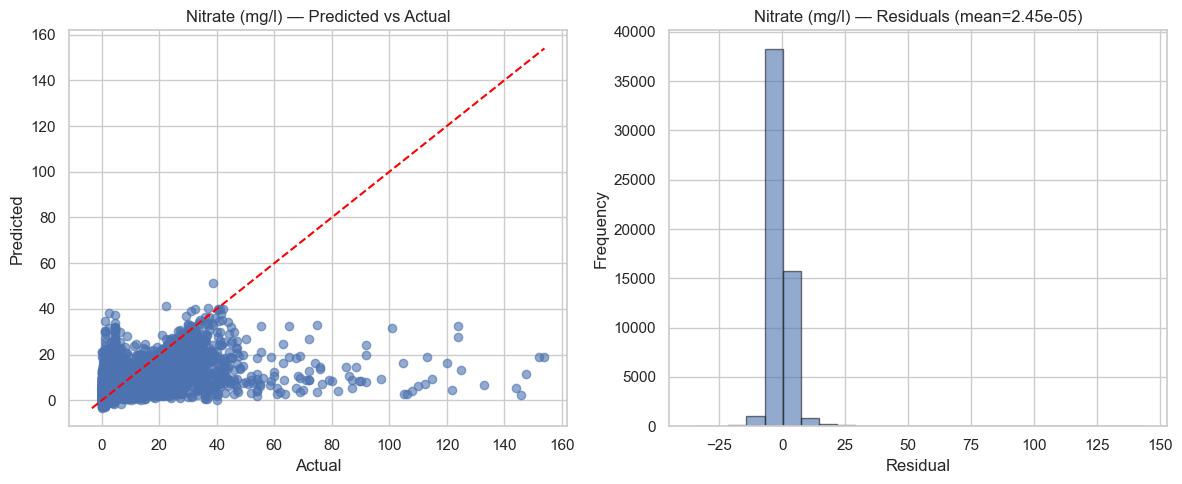

Target     Best Model  Train R²  Train RMSE  \
6                   Nitrogen (mg/l)    Extra Trees    1.0000      0.0024   
5                 Temperature (cel)    Extra Trees    0.9994      0.1199   
3             Orthophosphate (mg/l)    Extra Trees    1.0000      0.0009   
7                    Nitrate (mg/l)        XGBoost    0.5592      4.0194   
1  Biochemical Oxygen Demand (mg/l)  Random Forest    0.9229      4.5205   
0                    Ammonia (mg/l)        XGBoost    0.6171      3.5440   
4                     pH (ph units)  Random Forest    0.8992      0.1556   
2           Dissolved Oxygen (mg/l)        XGBoost    0.3199      1.5294   

    Train MAE  Val R²  Val RMSE     Val MAE  Test R²  Test RMSE  Test MAE  
6  2.6381e-05  1.0000    0.0039  4.3427e-05   0.8117     2.6746    0.8838  
5  4.4153e-03  0.9997    0.0919  3.5931e-03   0.7163     2.7267    1.6292  
3  8.8514e-06  1.0000    0.0002  3.9955e-06   0.4919     1.4995    0.4529  
7  1.4621e+00  0.5988    3.5677  1.4153e+00   0.4674     4.3707    1.5357  
1  1.0921e+00  0.9317    4.2834  1.0605e+00   0.4336    12.1700    2.9353  
0  8.9842e-01  0.6238    3.3147  8.6630e-01   0.4145     4.0751    1.0157  
4  9.8013e-02  0.8924    0.1563  9.7884e-02   0.3609     0.4032    0.2597  
2  9.5817e-01  0.3188    1.5288  9.5724e-01   0.2630     1.5778    0.9843

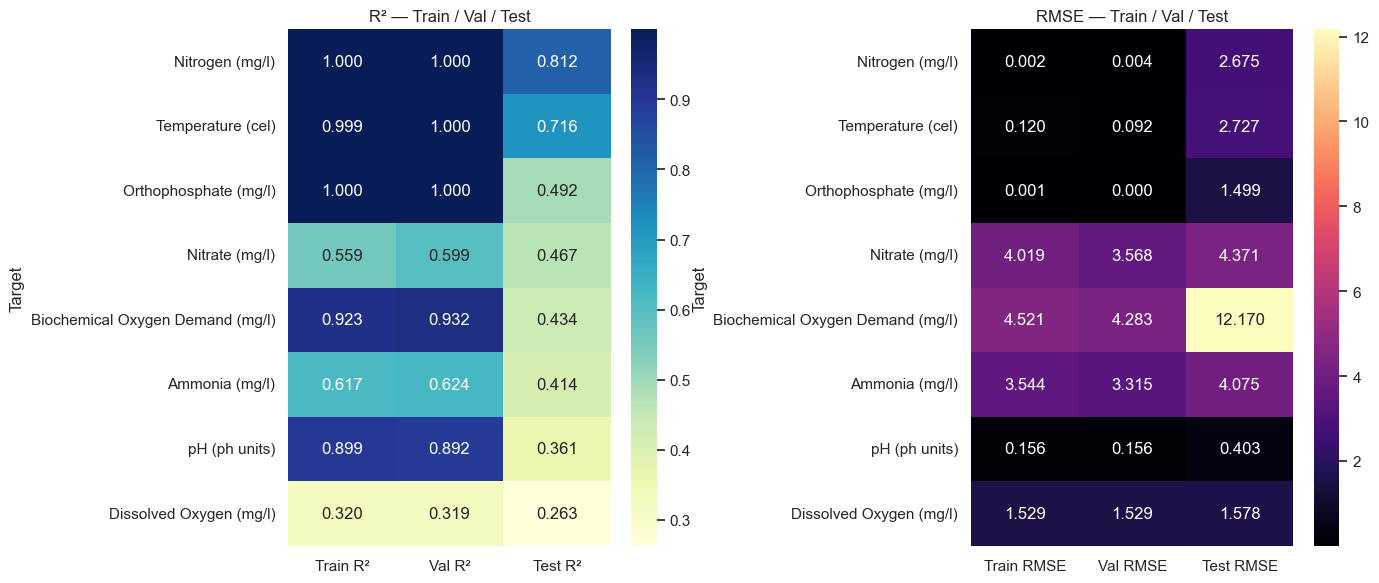

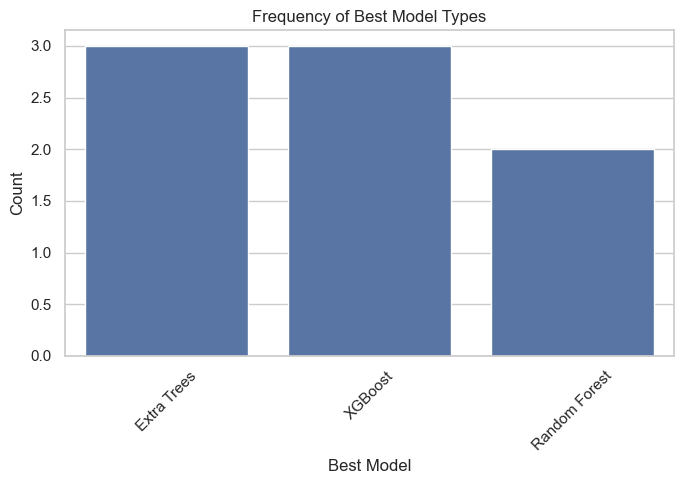

In [13]:
# ================================================
# Run Model 3 - Parameter Prediction
# ================================================

import seaborn as sns

# Use 10% of the data for quick testing
df_sample_model3 = df_clean.sample(frac=0.10, random_state=42)

# Preprocess manually for each target
from preprocessing_utils import preprocess_data

target_columns = [
    'Ammonia (mg/l)',
    'Biochemical Oxygen Demand (mg/l)',
    'Dissolved Oxygen (mg/l)',
    'Orthophosphate (mg/l)',
    'pH (ph units)',
    'Temperature (cel)',
    'Nitrogen (mg/l)',
    'Nitrate (mg/l)'
]

preprocessed_dict = {}
exclude_cols = ["CCME_Values", "CCME_WQI", "Date_String"]

for target in target_columns:
    X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data(
        df_sample_model3,
        target_column=target,
        exclude_features=exclude_cols,
        encoding="auto",
        scale=True,
        scaling_method="standard",
        random_state=42
    )
    preprocessed_dict[target] = (X_train, X_val, X_test, y_train, y_val, y_test)

# Run Model 3
from run_model_3_parameter_prediction import run_model_3_parameter_prediction

summary_model3, best_models_model3 = run_model_3_parameter_prediction(preprocessed_dict)

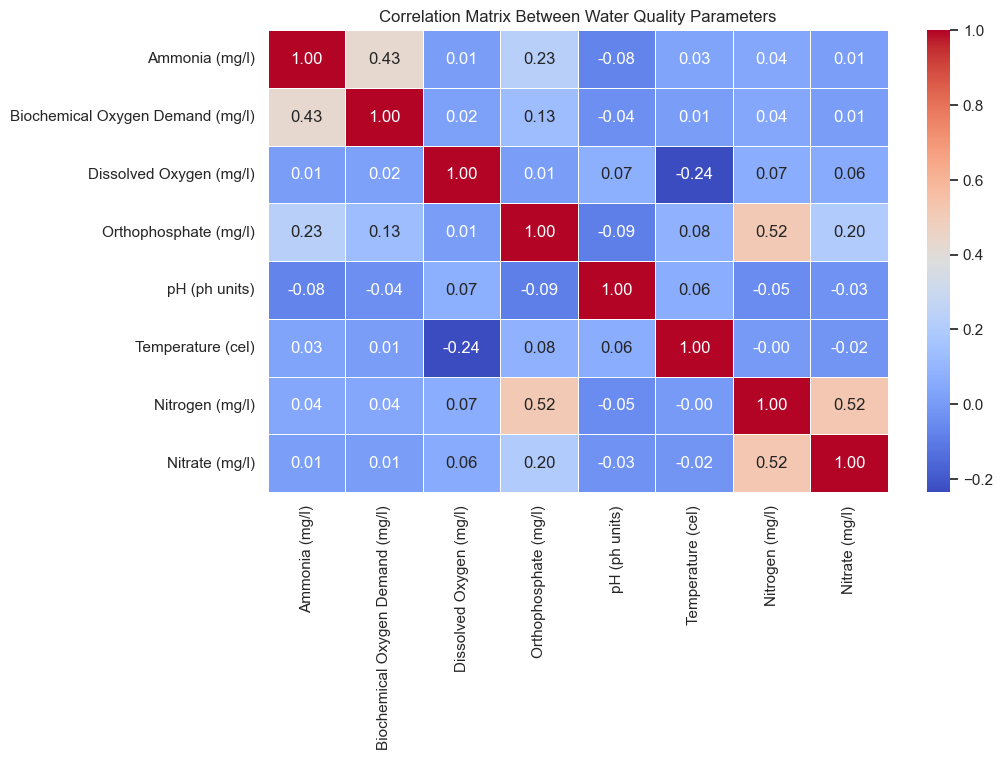

In [14]:
# Correlation Heatmap Between Water Quality Parameters 
import matplotlib.pyplot as plt
import seaborn as sns

# List of parameters (same used in your model)
PARAMS = [
    'Ammonia (mg/l)',
    'Biochemical Oxygen Demand (mg/l)',
    'Dissolved Oxygen (mg/l)',
    'Orthophosphate (mg/l)',
    'pH (ph units)',
    'Temperature (cel)',
    'Nitrogen (mg/l)',
    'Nitrate (mg/l)'
]

# Filter only those 8 columns
df_params = df_sample_model3[PARAMS]

# Compute correlation
corr_matrix = df_params.corr()

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix Between Water Quality Parameters")
plt.show()

🚫 Excluding features: ['CCME_Values', 'CCME_WQI', 'Date_String']
🤖 Using Auto Encoding (adaptive to cardinality)...
✅ One-Hot Encoding applied to: ['Country', 'Waterbody Type']
✅ Label Encoding applied to: ['Area']
⚖️ Applying StandardScaler (mean=0, std=1)...
🔍 Using quantile-based stratification for regression target.

✅ Data successfully preprocessed and split:
  Training set:   203614 samples
  Validation set: 22624 samples
  Test set:       56560 samples
  Total features: 32 columns
🚫 Excluding features: ['CCME_Values', 'CCME_WQI', 'Date_String']
🤖 Using Auto Encoding (adaptive to cardinality)...
✅ One-Hot Encoding applied to: ['Country', 'Waterbody Type']
✅ Label Encoding applied to: ['Area']
⚖️ Applying StandardScaler (mean=0, std=1)...
🔍 Using quantile-based stratification for regression target.

✅ Data successfully preprocessed and split:
  Training set:   203614 samples
  Validation set: 22624 samples
  Test set:       56560 samples
  Total features: 32 columns
🚫 Excluding fe

Targets:   0%|          | 0/8 [00:00<?, ?it/s]


🔹 Predicting: Ammonia (mg/l)


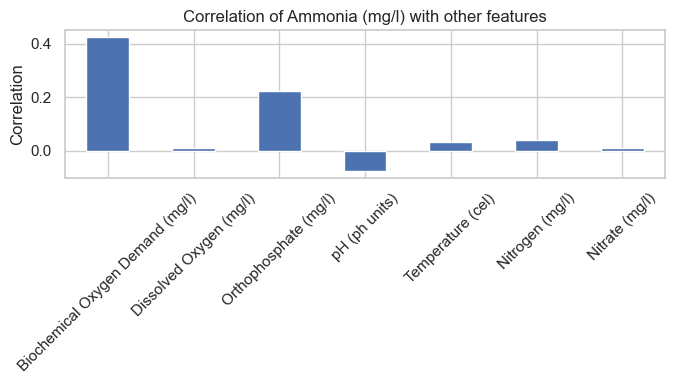


✅ Best model for Ammonia (mg/l): XGBoost
📊 TRAIN — RMSE=4.580, MAE=1.096, R²=0.360
📊 VAL   — RMSE=4.287, MAE=1.053, R²=0.371
📊 TEST  — RMSE=4.238, MAE=1.074, R²=0.367

🔹 Predicting: Biochemical Oxygen Demand (mg/l)


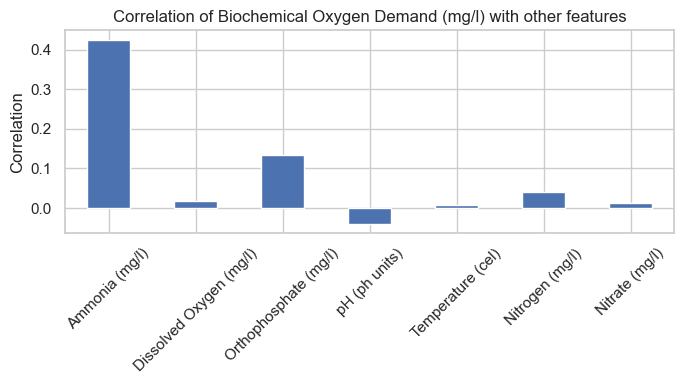


✅ Best model for Biochemical Oxygen Demand (mg/l): XGBoost
📊 TRAIN — RMSE=13.323, MAE=3.189, R²=0.330
📊 VAL   — RMSE=13.114, MAE=3.155, R²=0.360
📊 TEST  — RMSE=13.457, MAE=3.159, R²=0.307

🔹 Predicting: Dissolved Oxygen (mg/l)


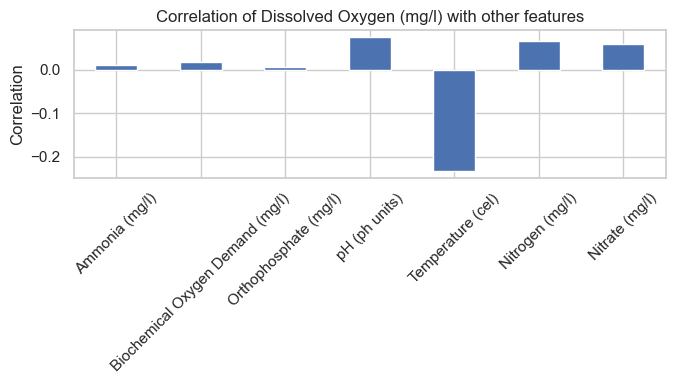


✅ Best model for Dissolved Oxygen (mg/l): XGBoost
📊 TRAIN — RMSE=1.682, MAE=1.068, R²=0.178
📊 VAL   — RMSE=1.685, MAE=1.070, R²=0.173
📊 TEST  — RMSE=1.666, MAE=1.060, R²=0.178

🔹 Predicting: Orthophosphate (mg/l)


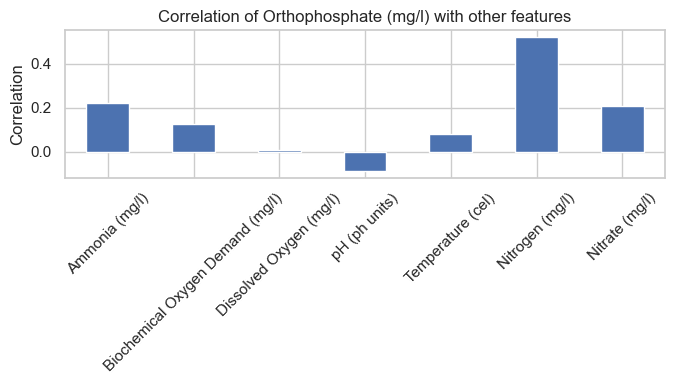


✅ Best model for Orthophosphate (mg/l): XGBoost
📊 TRAIN — RMSE=1.512, MAE=0.494, R²=0.465
📊 VAL   — RMSE=1.509, MAE=0.493, R²=0.474
📊 TEST  — RMSE=1.583, MAE=0.500, R²=0.434

🔹 Predicting: pH (ph units)


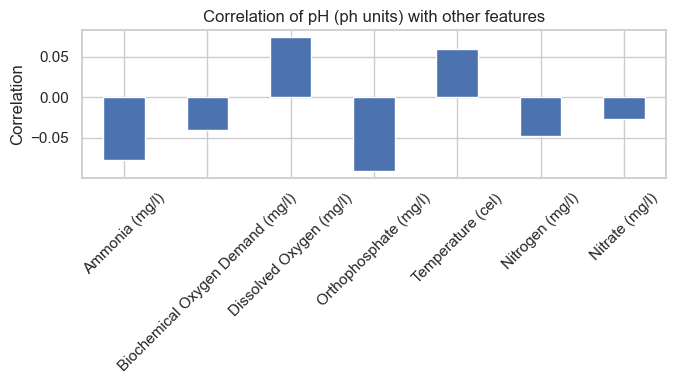


✅ Best model for pH (ph units): Random Forest
📊 TRAIN — RMSE=0.202, MAE=0.120, R²=0.830
📊 VAL   — RMSE=0.443, MAE=0.285, R²=0.135
📊 TEST  — RMSE=0.452, MAE=0.286, R²=0.197

🔹 Predicting: Temperature (cel)


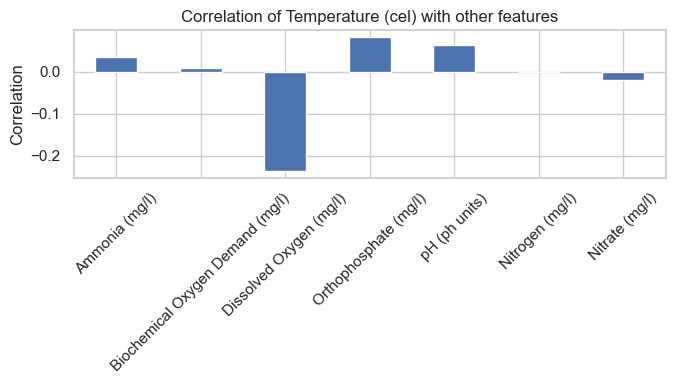


✅ Best model for Temperature (cel): Random Forest
📊 TRAIN — RMSE=1.988, MAE=1.174, R²=0.845
📊 VAL   — RMSE=4.352, MAE=2.797, R²=0.264
📊 TEST  — RMSE=4.283, MAE=2.750, R²=0.300

🔹 Predicting: Nitrogen (mg/l)


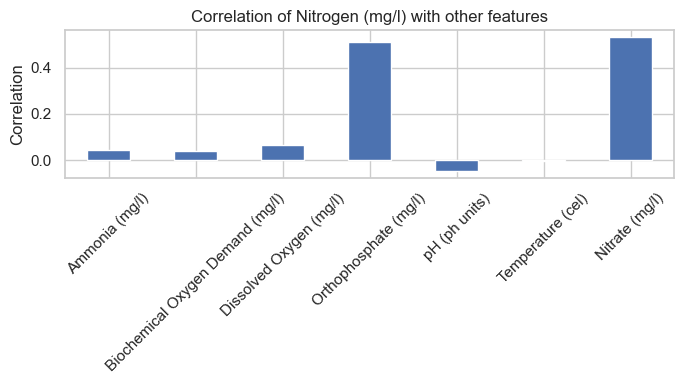


✅ Best model for Nitrogen (mg/l): Random Forest
📊 TRAIN — RMSE=1.088, MAE=0.361, R²=0.969
📊 VAL   — RMSE=2.785, MAE=0.928, R²=0.794
📊 TEST  — RMSE=2.861, MAE=0.957, R²=0.785

🔹 Predicting: Nitrate (mg/l)


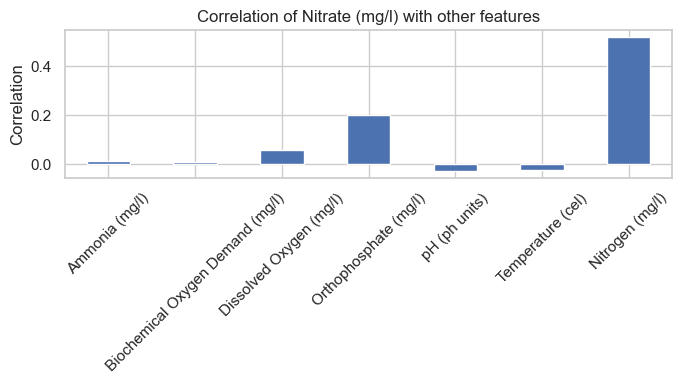


✅ Best model for Nitrate (mg/l): XGBoost
📊 TRAIN — RMSE=4.897, MAE=1.961, R²=0.346
📊 VAL   — RMSE=4.377, MAE=1.912, R²=0.396
📊 TEST  — RMSE=4.833, MAE=1.934, R²=0.349

=== FINAL RESULTS ===


Target     Best Model  Train RMSE  Train MAE  \
0                    Ammonia (mg/l)        XGBoost      4.5804     1.0961   
1  Biochemical Oxygen Demand (mg/l)        XGBoost     13.3231     3.1892   
2           Dissolved Oxygen (mg/l)        XGBoost      1.6818     1.0675   
3             Orthophosphate (mg/l)        XGBoost      1.5125     0.4944   
4                     pH (ph units)  Random Forest      0.2018     0.1203   
5                 Temperature (cel)  Random Forest      1.9877     1.1743   
6                   Nitrogen (mg/l)  Random Forest      1.0877     0.3611   
7                    Nitrate (mg/l)        XGBoost      4.8970     1.9606   

   Train R2  Val RMSE  Val MAE  Val R2  Test RMSE  Test MAE  Test R2  
0    0.3605    4.2867   1.0535  0.3708     4.2379    1.0744   0.3667  
1    0.3303   13.1135   3.1549  0.3597    13.4570    3.1586   0.3074  
2    0.1776    1.6849   1.0701  0.1727     1.6660    1.0602   0.1783  
3    0.4652    1.5086   0.4928  0.4736     1.5834    0.4999   0.4335  
4    0.8303    0.4431   0.2853  0.1350     0.4519    0.2863   0.1972  
5    0.8446    4.3525   2.7965  0.2637     4.2833    2.7501   0.2999  
6    0.9693    2.7851   0.9279  0.7943     2.8613    0.9568   0.7845  
7    0.3457    4.3775   1.9120  0.3961     4.8327    1.9336   0.3488

In [15]:
# ================================================
# Run Model 3 - Parameter Prediction (TUNING VERSION)
# ================================================

df_sample_model3 = df_clean.sample(frac=0.10, random_state=42)

from preprocessing_utils import preprocess_data

target_columns = [
    'Ammonia (mg/l)',
    'Biochemical Oxygen Demand (mg/l)',
    'Dissolved Oxygen (mg/l)',
    'Orthophosphate (mg/l)',
    'pH (ph units)',
    'Temperature (cel)',
    'Nitrogen (mg/l)',
    'Nitrate (mg/l)'
]

preprocessed_dict = {}
exclude_cols = ["CCME_Values", "CCME_WQI", "Date_String"]

for target in target_columns:
    X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data(
        df_sample_model3,
        target_column=target,
        exclude_features=exclude_cols,
        encoding="auto",
        scale=True,
        scaling_method="standard",
        random_state=42
    )
    preprocessed_dict[target] = (X_train, X_val, X_test, y_train, y_val, y_test)


# --------------------------------------------------
# NEW WORKING IMPORT
# --------------------------------------------------
from model_3_final import run_model_3_final

# Run the full parameter prediction + tuning
summary_model3 = run_model_3_final(preprocessed_dict, show_plots=True)


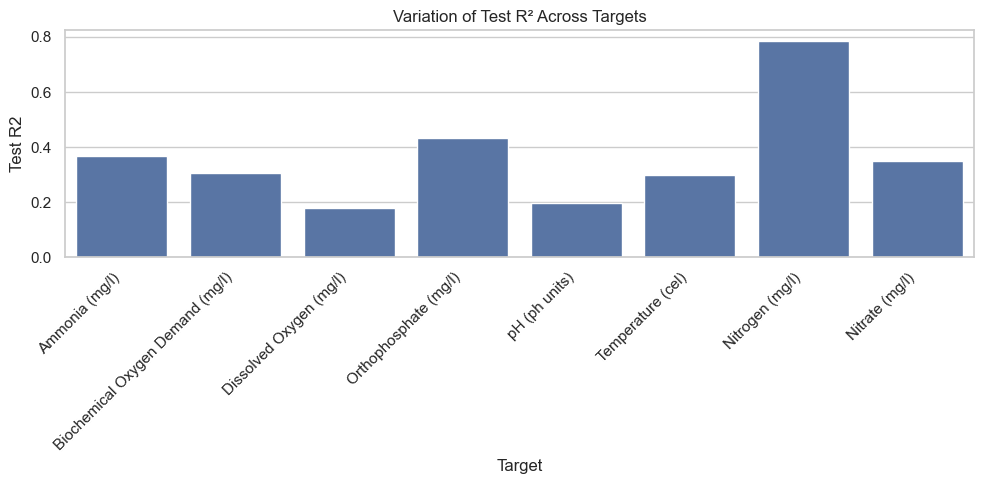

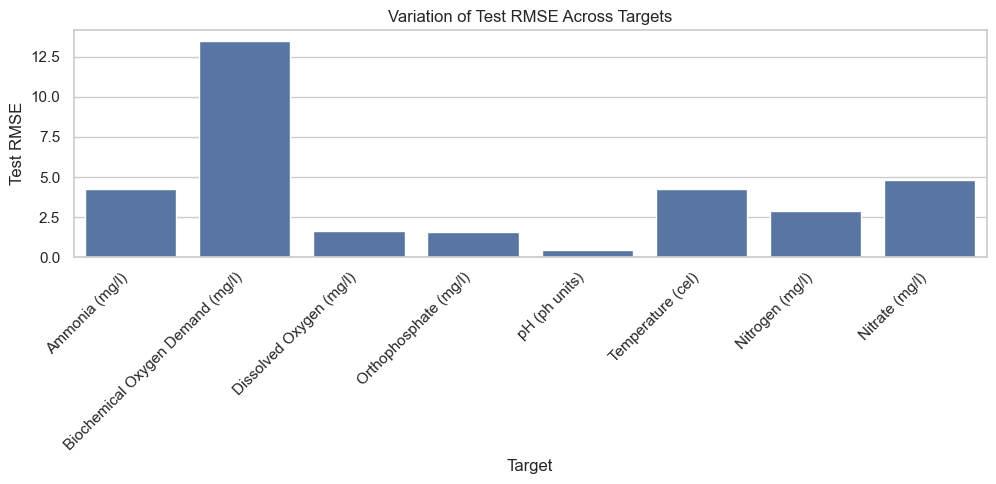

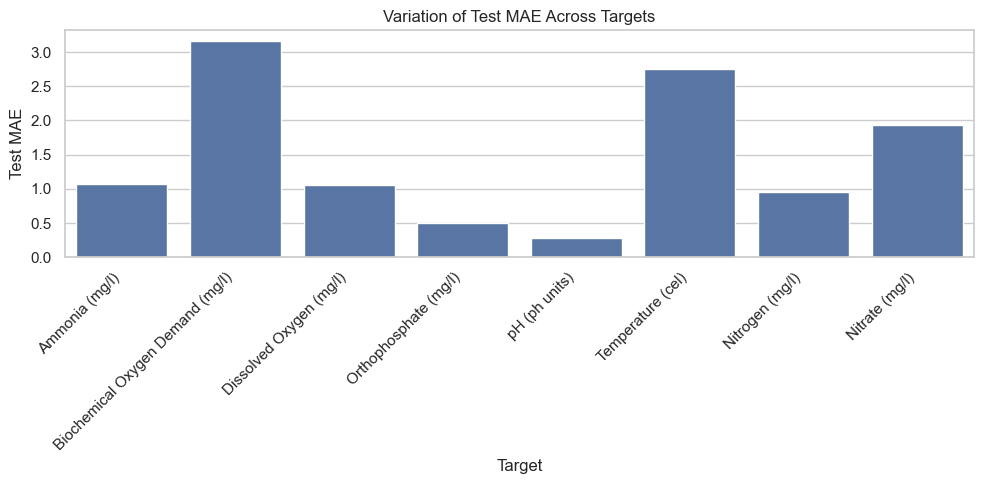

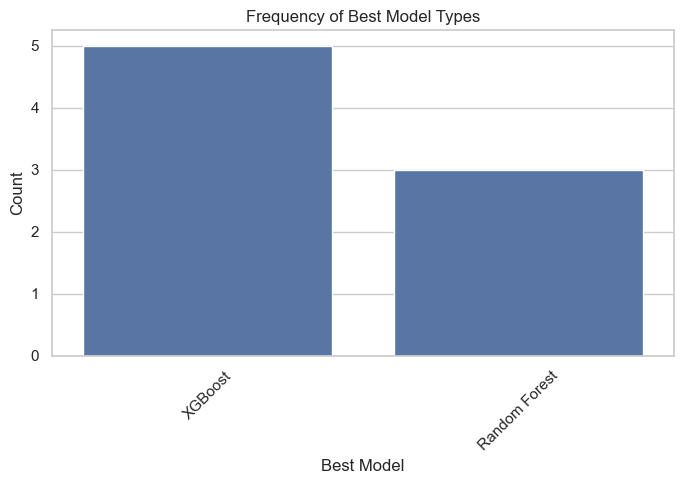

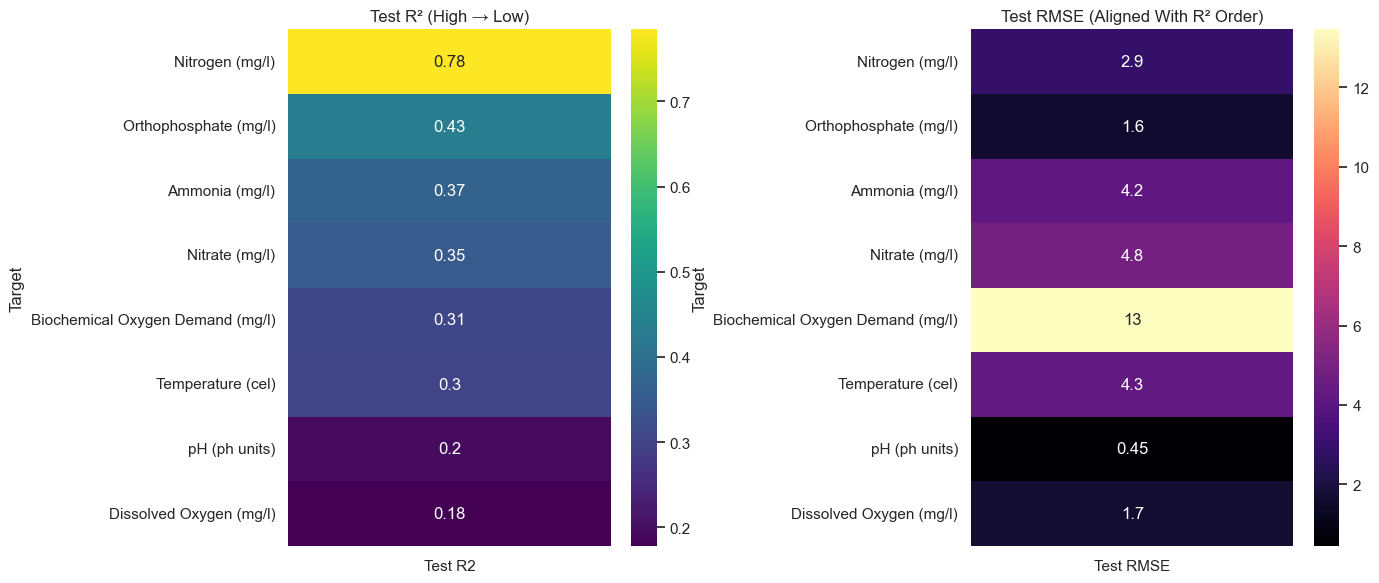

In [16]:
# Plots display for Model 3 With Tuning
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------------------------
# Make a working copy
# -----------------------------------------------
df = summary_model3.copy()

# ------------------------------
# 1) Bar plot — Test R2 vs Target
# ------------------------------
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Target", y="Test R2")
plt.title("Variation of Test R² Across Targets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ------------------------------
# 2) Bar plot — Test RMSE vs Target
# ------------------------------
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Target", y="Test RMSE")
plt.title("Variation of Test RMSE Across Targets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ------------------------------
# 3) Bar plot — Test MAE vs Target
# ------------------------------
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Target", y="Test MAE")
plt.title("Variation of Test MAE Across Targets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 4) Bar plot — Frequency of Best Model Types
# --------------------------------------------------
plt.figure(figsize=(7,5))
model_counts = df["Best Model"].value_counts()
sns.barplot(x=model_counts.index, y=model_counts.values)
plt.title("Frequency of Best Model Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 5 & 6) Side-by-Side Heatmaps
#     - Left: Test R² (sorted high → low)
#     - Right: Test RMSE matched to the same order
# --------------------------------------------------

# Sort only by Test R2 descending
df_sorted = df.sort_values(by="Test R2", ascending=False)

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Heatmap 1: Test R2 ----
sns.heatmap(
    df_sorted[["Test R2"]].set_index(df_sorted["Target"]),
    annot=True,
    cmap="viridis",
    ax=axes[0]
)
axes[0].set_title("Test R² (High → Low)")

# ---- Heatmap 2: Test RMSE (same order as R2) ----
sns.heatmap(
    df_sorted[["Test RMSE"]].set_index(df_sorted["Target"]),
    annot=True,
    cmap="magma",
    ax=axes[1]
)
axes[1].set_title("Test RMSE (Aligned With R² Order)")

plt.tight_layout()
plt.show()


### Run Model 4 (UNSUPERVISED LEARNING)

🔍 Using 282798 samples out of 2827977 for Model 4
🔍 Running Unsupervised Model 4 (Chemistry-only PCA)...

📌 Using 282798 samples × 8 chemistry features

📉 PCA Explained Variance Ratio:
   PC1 = 0.242
   PC2 = 0.177

🔎 Top contributors to PC1:
Nitrogen (mg/l)                     0.5868
Orthophosphate (mg/l)               0.5375
Nitrate (mg/l)                      0.4584
Ammonia (mg/l)                      0.2820
Biochemical Oxygen Demand (mg/l)    0.2399
pH (ph units)                       0.1204
Dissolved Oxygen (mg/l)             0.0672
Temperature (cel)                   0.0214
Name: PC1_Loading, dtype: float64 

🔎 Top contributors to PC2:
Ammonia (mg/l)                      0.6079
Biochemical Oxygen Demand (mg/l)    0.5946
Nitrate (mg/l)                      0.3497
Nitrogen (mg/l)                     0.2981
Dissolved Oxygen (mg/l)             0.1627
Temperature (cel)                   0.1574
pH (ph units)                       0.1174
Orthophosphate (mg/l)               0.0271
Name: 

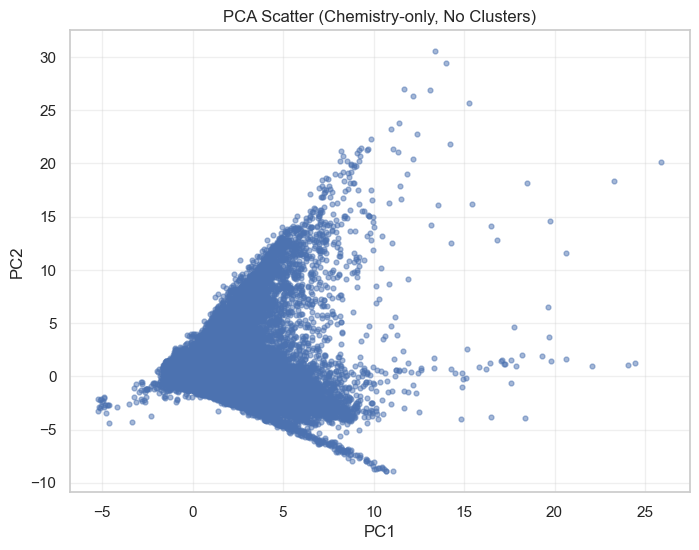

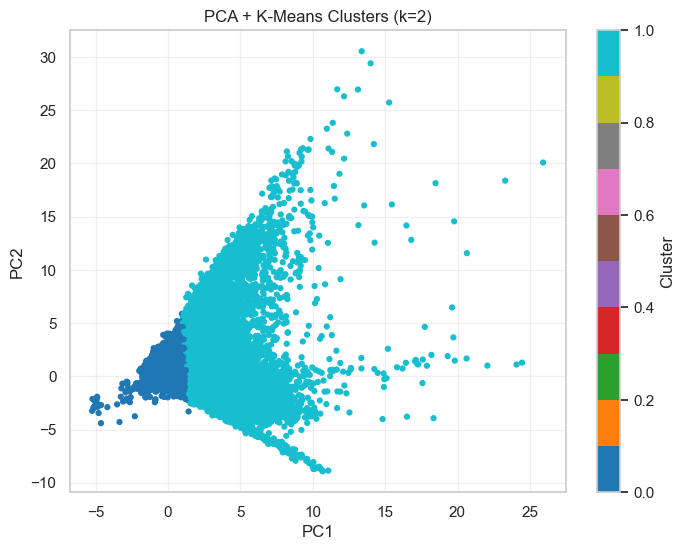

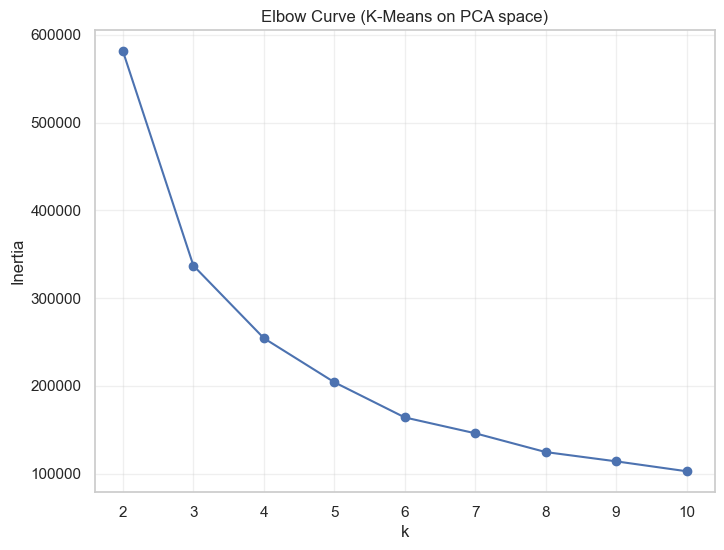

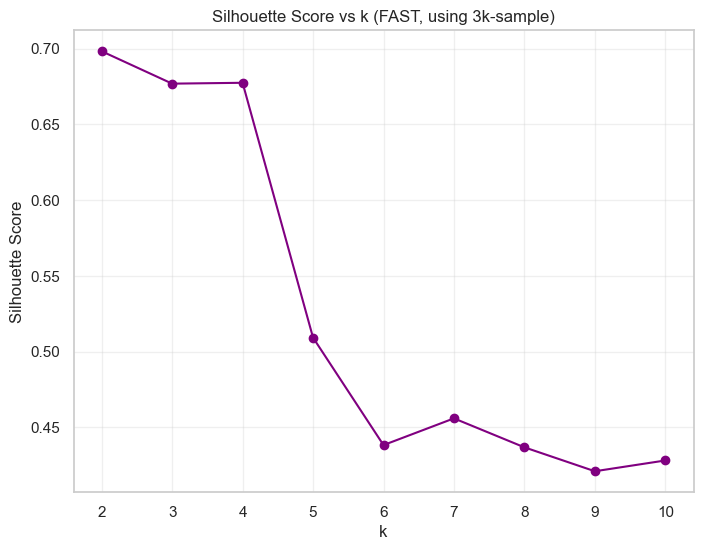


🏆 Best k by FAST Silhouette Score: 2
Best Silhouette Score: 0.6983112565349563

📌 Cluster counts (best k):
Cluster_bestK
0    248975
1     33823
Name: count, dtype: int64


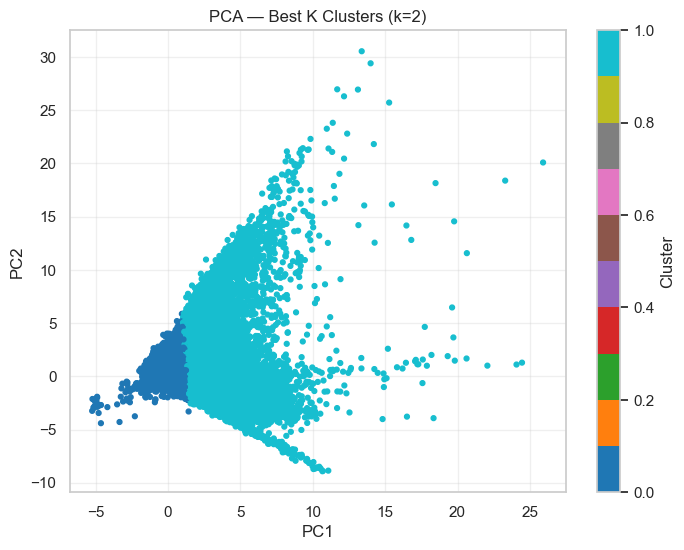

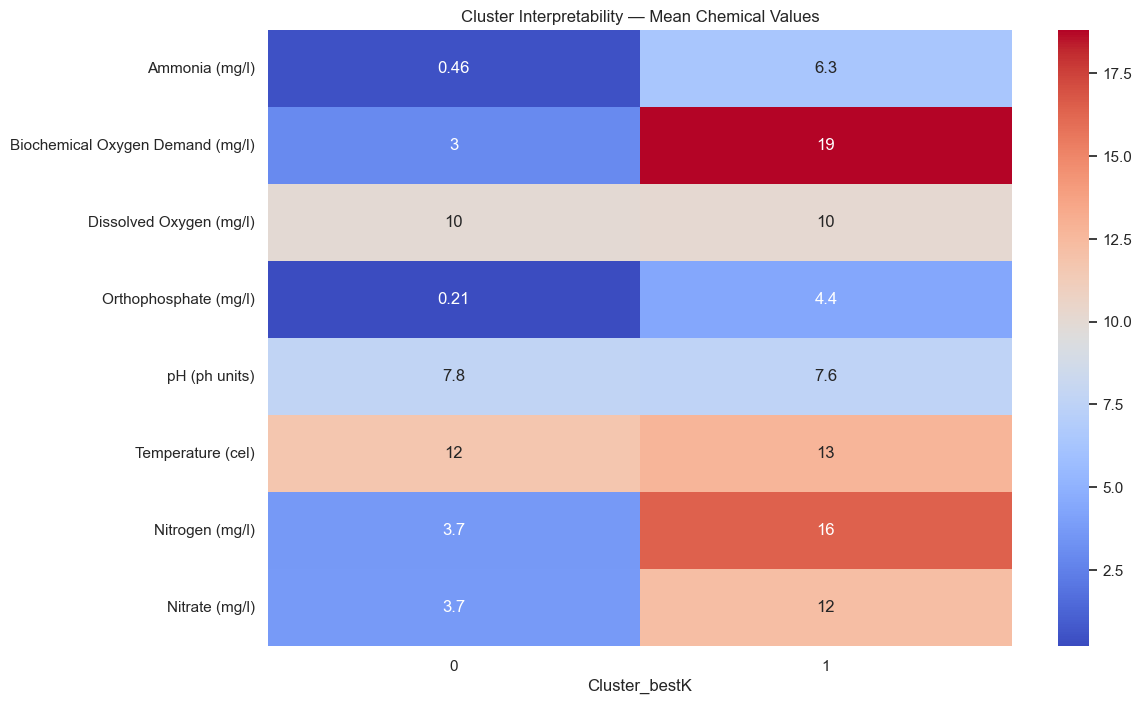


📊 Final Cluster Sizes:
Cluster_bestK
0    248975
1     33823
Name: count, dtype: int64


In [17]:
# ================================================
# Run Model 4 (Chemistry-only PCA + Clustering)
# ================================================

# Use only a fraction of the data for speed
df_sample = df_clean.sample(frac=0.1, random_state=42)
print(f"🔍 Using {len(df_sample)} samples out of {len(df_clean)} for Model 4")

from run_model_4 import run_model_4
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --------------------------------------
# 1️⃣ RUN MODEL 4 ON THE CHEMISTRY-ONLY INPUT
# --------------------------------------
model4_results = run_model_4(df_sample)

# Unpack results
X_chem        = model4_results["X_chem"]
X_scaled      = model4_results["X_scaled"]
X_pca         = model4_results["X_pca"]
clusters      = model4_results["clusters"]
sil_score     = model4_results["silhouette_score"]
kmeans_model  = model4_results["kmeans_model"]
loadings      = model4_results["pca_loadings"]

# Add initial cluster labels
df_sample_clustered = df_sample.loc[X_chem.index].copy()
df_sample_clustered["Cluster_k2"] = clusters

print("\n📌 Chemistry features used:")
print(", ".join(X_chem.columns))

print("\n📌 Cluster counts (k=2):")
print(df_sample_clustered["Cluster_k2"].value_counts())


# --------------------------------------
# 2️⃣ PCA-ONLY (NO CLUSTERING)
# --------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=12, alpha=0.5)
plt.title("PCA Scatter (Chemistry-only, No Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)
plt.show()


# --------------------------------------
# 3️⃣ PCA + K=2 CLUSTERS
# --------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="tab10", s=12)
plt.title("PCA + K-Means Clusters (k=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.grid(alpha=0.3)
plt.show()


# --------------------------------------
# 4️⃣ ELBOW CURVE (Run K-Means in PCA Space)
# --------------------------------------
inertia_list = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Curve (K-Means on PCA space)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(alpha=0.3)
plt.show()


# # --------------------------------------
# # 5️⃣ SILHOUETTE SCORE CURVE
# # --------------------------------------
# silhouette_scores = []

# for k in K_range:
#     km = KMeans(n_clusters=k, random_state=42)
#     labels = km.fit_predict(X_pca)
#     sil = silhouette_score(X_pca, labels)
#     silhouette_scores.append(sil)

# plt.figure(figsize=(8, 6))
# plt.plot(K_range, silhouette_scores, marker='o', color='purple')
# plt.title("Silhouette Score vs k (PCA space)")
# plt.xlabel("k")
# plt.ylabel("Silhouette Score")
# plt.grid(alpha=0.3)
# plt.show()

# best_k = K_range[np.argmax(silhouette_scores)]
# print(f"\n🏆 Best k by Silhouette Score: {best_k}")
# print("Best Silhouette Score:", np.max(silhouette_scores))

# --------------------------------------
# 5️⃣ FAST SILHOUETTE SCORE CURVE  (subsampled)
# --------------------------------------

# Subsample PCA points for silhouette (avoid O(n^2) to run faster)
N_SIL = 3000
X_sil = X_pca[np.random.choice(len(X_pca), size=min(N_SIL, len(X_pca)), replace=False)]

silhouette_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_sil)
    sil = silhouette_score(X_sil, labels)
    silhouette_scores.append(sil)

plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o', color='purple')
plt.title("Silhouette Score vs k (FAST, using 3k-sample)")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(alpha=0.3)
plt.show()

best_k = K_range[np.argmax(silhouette_scores)]
print(f"\n🏆 Best k by FAST Silhouette Score: {best_k}")
print("Best Silhouette Score:", np.max(silhouette_scores))


# --------------------------------------
# 6️⃣ RE-RUN KMEANS USING BEST K
# --------------------------------------
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
best_clusters = kmeans_best.fit_predict(X_pca)

df_sample_clustered["Cluster_bestK"] = best_clusters

print("\n📌 Cluster counts (best k):")
print(df_sample_clustered["Cluster_bestK"].value_counts())


# --------------------------------------
# 7️⃣ PCA SCATTER FOR BEST K
# --------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_clusters, cmap="tab10", s=12)
plt.title(f"PCA — Best K Clusters (k={best_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.grid(alpha=0.3)
plt.show()


# --------------------------------------
# 8️⃣ CLUSTER INTERPRETABILITY (HEATMAP)
# --------------------------------------
cluster_table = df_sample_clustered.groupby("Cluster_bestK")[X_chem.columns].mean().T
cluster_table = cluster_table.round(3)

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_table, annot=True, cmap="coolwarm")
plt.title("Cluster Interpretability — Mean Chemical Values")
plt.show()

cluster_table


# --------------------------------------
# 9️⃣ CLUSTER SIZE SUMMARY
# --------------------------------------
print("\n📊 Final Cluster Sizes:")
print(df_sample_clustered["Cluster_bestK"].value_counts())

In [18]:
# ============================================
# SHOW FEATURE NAMES FOR MODEL 4 (SEPARATE CELL)
# ============================================

X_chem = model4_results["X_chem"]    # updated key
feature_names = list(X_chem.columns)

print("\n📌 Features used in Model 4:\n(")
print(", ".join(feature_names))
print(")\n")


📌 Features used in Model 4:
(
Ammonia (mg/l), Biochemical Oxygen Demand (mg/l), Dissolved Oxygen (mg/l), Orthophosphate (mg/l), pH (ph units), Temperature (cel), Nitrogen (mg/l), Nitrate (mg/l)
)



📉 PCA Explained Variance Ratio:
   PC1 = 0.242
   PC2 = 0.177
   PC3 = 0.155

🔎 PCA Loadings (Absolute Values Ranked by PC):
                                  PC1_Loading  PC2_Loading  PC3_Loading
Nitrogen (mg/l)                        0.5868       0.2981       0.0640
Orthophosphate (mg/l)                  0.5375       0.0271       0.1320
Nitrate (mg/l)                         0.4584       0.3497       0.0136
Ammonia (mg/l)                         0.2820       0.6079       0.1381
Biochemical Oxygen Demand (mg/l)       0.2399       0.5946       0.1919
pH (ph units)                          0.1204       0.1174       0.0078
Dissolved Oxygen (mg/l)                0.0672       0.1627       0.6745
Temperature (cel)                      0.0214       0.1574       0.6837


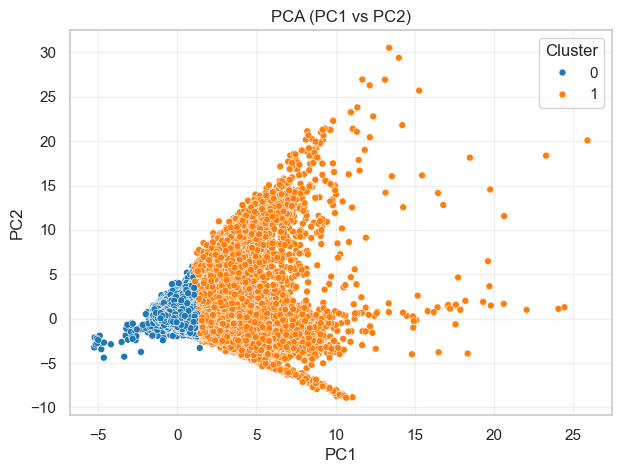

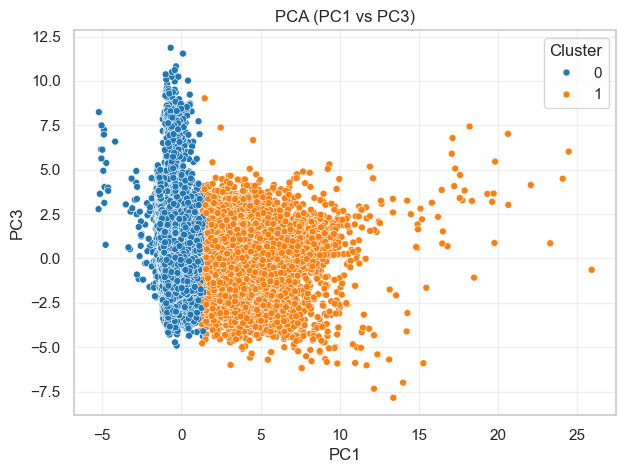

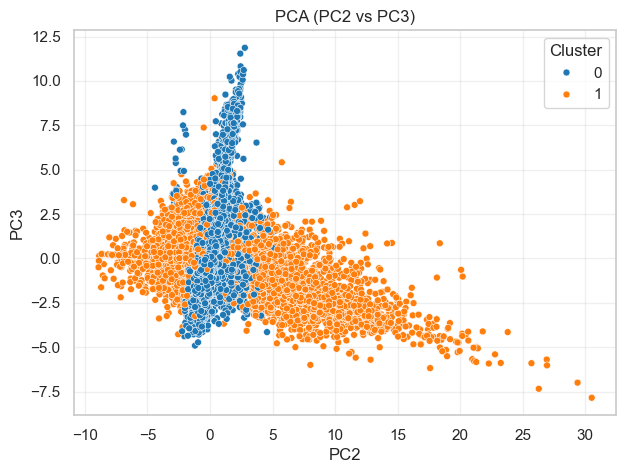

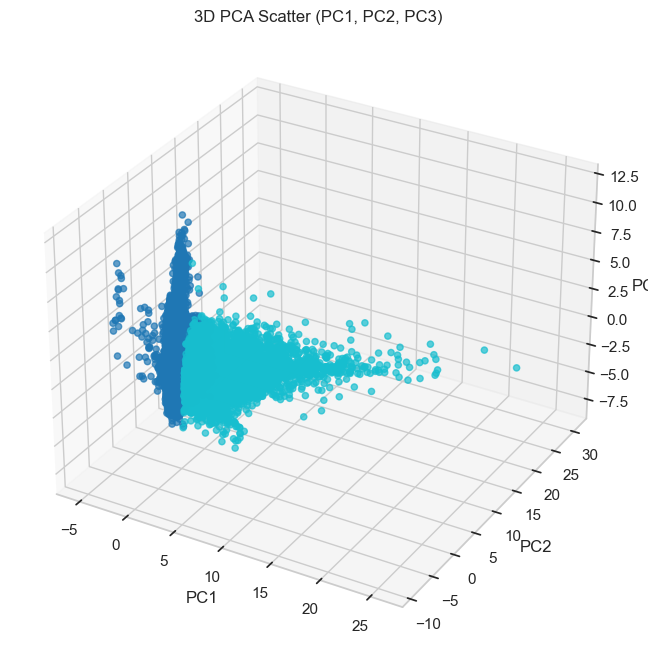

In [19]:
# ===========================================================
# 🔍 PCA WITH 3 COMPONENTS (Chemistry-only)
# ===========================================================

from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 1️⃣ Run PCA with 3 components
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

# 2️⃣ Print explained variance
print("📉 PCA Explained Variance Ratio:")
for i, var in enumerate(pca3.explained_variance_ratio_, start=1):
    print(f"   PC{i} = {var:.3f}")

# 3️⃣ Loadings (feature contributions)
loadings3 = pd.DataFrame(
    pca3.components_.T,
    columns=["PC1_Loading", "PC2_Loading", "PC3_Loading"],
    index=X_chem.columns
)

print("\n🔎 PCA Loadings (Absolute Values Ranked by PC):")
print(loadings3.abs().sort_values("PC1_Loading", ascending=False))

# 4️⃣ 2D Pairplots (PC1-PC2, PC1-PC3, PC2-PC3)
df_pca3 = pd.DataFrame({
    "PC1": X_pca3[:, 0],
    "PC2": X_pca3[:, 1],
    "PC3": X_pca3[:, 2],
    "Cluster": clusters
})

plt.figure(figsize=(7,5))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca3, s=25, palette="tab10")
plt.title("PCA (PC1 vs PC2)")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=df_pca3, s=25, palette="tab10")
plt.title("PCA (PC1 vs PC3)")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=df_pca3, s=25, palette="tab10")
plt.title("PCA (PC2 vs PC3)")
plt.grid(alpha=0.3)
plt.show()

# 5️⃣ 3D PCA Scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_pca3[:, 0],
    X_pca3[:, 1],
    X_pca3[:, 2],
    c=clusters,
    cmap="tab10",
    s=20,
    alpha=0.7
)

ax.set_title("3D PCA Scatter (PC1, PC2, PC3)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

# Return PCA objects if needed
pca3_results = {
    "X_pca3": X_pca3,
    "pca3_model": pca3,
    "loadings3": loadings3
}


PCA on eight core chemical parameters revealed three meaningful gradients explaining ~58% of total variance: nutrient pollution (PC1), organic load (PC2), and a temperature–oxygen axis (PC3). The K-means clusters separate clean, low-nutrient samples (cluster 0, smaller) from nutrient-rich / organically polluted samples (cluster 1, larger). Although CCME classification suggests that most samples fall under “Excellent,” PCA and K-means reveal that a large portion of the dataset exhibits elevated nutrient and organic pollution levels. This apparent mismatch occurs because CCME is a guideline-based categorical index that compresses complex chemistry into broad classes, while PCA captures continuous variation in chemical concentrations. Hence, chemical pollution patterns can be widespread even when CCME scores appear high. This highlights that statistical chemistry patterns can reveal hidden pollution gradients not visible through CCME scores alone.

Additionally, Clusters in PCA space overlap because water chemistry is a continuous gradient rather than discrete categories. K-means identifies groups in the full multidimensional feature space, so boundaries appear smooth when projected onto 2D (PC1–PC2). There is no assumed split at around PC1 = 1, this is simply where nutrient-rich samples begin to diverge from clean-water samples along the nutrient pollution axis.

### EXTRA

In [5]:
import tensorflow as tf
print(tf.__version__)


2.20.0



🔥 Running Model 5 (LSTM) on 10% sample for quick evaluation

Categorical columns to encode: ['Country', 'Area', 'Waterbody Type', 'CCME_WQI']
📌 Final sample size: 282,798 rows
📌 Final columns (all numeric): ['Country', 'Area', 'Waterbody Type', 'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)', 'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)', 'pH (ph units)', 'Temperature (cel)', 'Nitrogen (mg/l)', 'Nitrate (mg/l)', 'CCME_Values', 'CCME_WQI', 'Year', 'Month', 'Day', 'Date_Ordinal', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Year_norm']

🏗️ Running LSTM Model: Predicting 'CCME_Values' using Sequential Windows ...

⚖️ Scaling all features except target...

📌 Creating sliding windows (window size = 30) ...
   → Created 282,768 sequences
   → Input shape: (282768, 30, 21)

📊 Sequence Split:
   Train: 197,937
   Val:   28,277
   Test:  56,554

🧠 Training LSTM model...
Epoch 1/15
3093/3093 ━━━━━━━━━━━━━━━━━━━━ 89s 28ms/step - loss: 2077.2246 - val_loss: 385.1107
Epoch 2/15
3093/

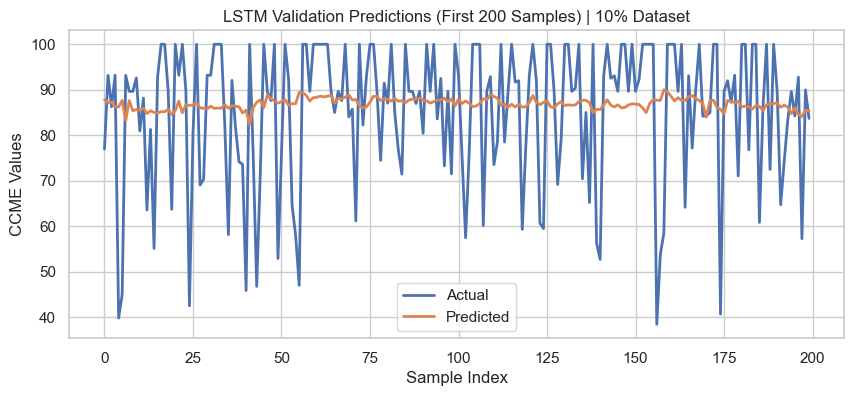

In [12]:
# ============================================================
# LSTM (Model 5) --- EXTRA
# ============================================================

from run_model_LSTM import run_model_lstm
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

print("\n🔥 Running Model 5 (LSTM) on 10% sample for quick evaluation\n")

# ------------------------------------------------------------
# 1️⃣ Sample a fraction of the data
# ------------------------------------------------------------
df_sample = df_clean.sample(frac=0.1, random_state=42).copy()

# ------------------------------------------------------------
# 2️⃣ REMOVE datetime and string date columns (CRITICAL)
# ------------------------------------------------------------
cols_to_drop = ["Date", "Date_String"]
df_sample = df_sample.drop(columns=[c for c in cols_to_drop if c in df_sample.columns])

# ------------------------------------------------------------
# 3️⃣ Label-encode all categorical columns
# ------------------------------------------------------------
categorical_cols = df_sample.select_dtypes(include=["object"]).columns.tolist()
print(f"Categorical columns to encode: {categorical_cols}")

for col in categorical_cols:
    le = LabelEncoder()
    df_sample[col] = le.fit_transform(df_sample[col].astype(str))

# ------------------------------------------------------------
# 4️⃣ Ensure dataset is fully numeric
# ------------------------------------------------------------
assert df_sample.select_dtypes(exclude=[np.number]).empty, \
    "❌ Non-numeric columns remain! Check the cleaning steps."

# ------------------------------------------------------------
# 5️⃣ Sort chronologically for LSTM
# ------------------------------------------------------------
df_sample = df_sample.sort_values("Date_Ordinal").reset_index(drop=True)

print(f"📌 Final sample size: {len(df_sample):,} rows")
print(f"📌 Final columns (all numeric): {df_sample.columns.tolist()}")

# ------------------------------------------------------------
# 6️⃣ Run the LSTM model
# ------------------------------------------------------------
lstm_results, lstm_model, X_train_seq, y_train_seq, X_val_seq, y_val_seq, X_test_seq, y_test_seq = run_model_lstm(
    df_sample,
    window_size=30
)

# ------------------------------------------------------------
# 7️⃣ Print results
# ------------------------------------------------------------
print("\n📊 LSTM Results Summary (fraction of the dataset):")
for k, v in lstm_results.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

# ------------------------------------------------------------
# 8️⃣ Optional: Prediction plot
# ------------------------------------------------------------
import matplotlib.pyplot as plt

print("\n📉 Generating LSTM prediction plot for 10% sample...")

val_pred_seq = lstm_model.predict(X_val_seq).flatten()

plt.figure(figsize=(10, 4))
plt.plot(y_val_seq[:200], label="Actual", linewidth=2)
plt.plot(val_pred_seq[:200], label="Predicted", linewidth=2)
plt.title("LSTM Validation Predictions (First 200 Samples) | 10% Dataset")
plt.xlabel("Sample Index")
plt.ylabel("CCME Values")
plt.legend()
plt.grid(True)
plt.show()


🔥 Running LSTM with Country-based sequences (10% sample)

📌 Sample size: 282,798 rows
Categorical columns: ['Country', 'Area', 'Waterbody Type', 'CCME_WQI']

📌 Creating sliding windows (window size = 30) ...
   → Created 212,678 sequences
   → Input shape: (212678, 30, 21)
   ✔ Country 2: 212,678 sequences

📌 Creating sliding windows (window size = 30) ...
   → Created 23,543 sequences
   → Input shape: (23543, 30, 21)
   ✔ Country 3: 23,543 sequences

📌 Creating sliding windows (window size = 30) ...
   → Created 41,467 sequences
   → Input shape: (41467, 30, 21)
   ✔ Country 4: 41,467 sequences

📌 Creating sliding windows (window size = 30) ...
   → Created 4,574 sequences
   → Input shape: (4574, 30, 21)
   ✔ Country 1: 4,574 sequences

📌 Creating sliding windows (window size = 30) ...
   → Created 386 sequences
   → Input shape: (386, 30, 21)
   ✔ Country 0: 386 sequences

📌 Total sequences across countries: 282,648

📊 Split sizes:
   Train: 197,853
   Val:   28,265
   Test:  56,5

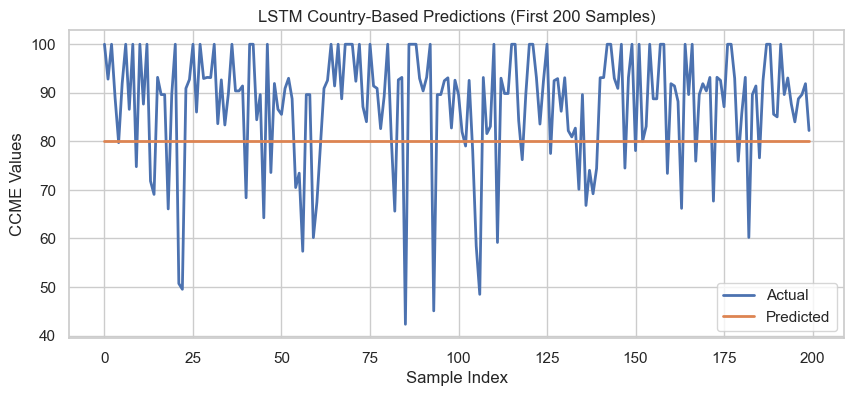

In [13]:
# ============================================================
# 📌 LSTM ON COUNTRY-SPECIFIC SEQUENCES (10% DATASET)
# ============================================================

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from run_model_LSTM import run_model_lstm   # same LSTM trainer as before

print("\n🔥 Running LSTM with Country-based sequences (10% sample)\n")

# ------------------------------------------------------------
# 1️⃣ SAMPLE 10% OF THE DATASET
# ------------------------------------------------------------
df_sample = df_clean.sample(frac=0.1, random_state=42).copy()
print(f"📌 Sample size: {len(df_sample):,} rows")

# ------------------------------------------------------------
# 2️⃣ REMOVE datetime columns
# ------------------------------------------------------------
df_sample = df_sample.drop(columns=["Date", "Date_String"], errors="ignore")

# ------------------------------------------------------------
# 3️⃣ LABEL-ENCODE all categorical columns (Country, Waterbody Type, Area)
# ------------------------------------------------------------
categorical_cols = df_sample.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", categorical_cols)

for col in categorical_cols:
    le = LabelEncoder()
    df_sample[col] = le.fit_transform(df_sample[col].astype(str))

# ------------------------------------------------------------
# 4️⃣ BUILD COUNTRY-BASED SEQUENCES
# ------------------------------------------------------------
from run_model_LSTM import create_sliding_windows   # IMPORTANT FIX

def create_country_sequences(df, window_size=30):
    all_X = []
    all_y = []

    for country in df["Country"].unique():
        country_df = df[df["Country"] == country].sort_values("Date_Ordinal")

        if len(country_df) <= window_size:
            print(f"   ⚠️ Skipping {country}: not enough data")
            continue

        # ✔ Use the imported function correctly
        X_seq, y_seq, _ = create_sliding_windows(
            country_df,
            target_column="CCME_Values",
            window_size=window_size
        )

        all_X.append(X_seq)
        all_y.append(y_seq)

        print(f"   ✔ Country {country}: {len(X_seq):,} sequences")

    # Concatenate all sequences
    X = np.concatenate(all_X, axis=0)
    y = np.concatenate(all_y, axis=0)

    print(f"\n📌 Total sequences across countries: {X.shape[0]:,}")
    return X, y

# Actually generate the sequences
X_all, y_all = create_country_sequences(df_sample, window_size=30)

# ------------------------------------------------------------
# 5️⃣ CREATE TRAIN / VAL / TEST SPLIT
# ------------------------------------------------------------
def split_sequences(X, y, train_ratio=0.7, val_ratio=0.1):
    n = len(X)
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))
    return (X[:train_end], y[:train_end],
            X[train_end:val_end], y[train_end:val_end],
            X[val_end:], y[val_end:])

X_train_seq, y_train_seq, X_val_seq, y_val_seq, X_test_seq, y_test_seq = split_sequences(X_all, y_all)

print("\n📊 Split sizes:")
print(f"   Train: {len(X_train_seq):,}")
print(f"   Val:   {len(X_val_seq):,}")
print(f"   Test:  {len(X_test_seq):,}")

# ------------------------------------------------------------
# 6️⃣ TRAIN LSTM MODEL
# ------------------------------------------------------------
from run_model_LSTM import build_lstm_model
import tensorflow as tf
import time

input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
model = build_lstm_model(input_shape)

print("\n🧠 Training LSTM model...")
start = time.time()

history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=15,
    batch_size=64,
    verbose=1
)

end = time.time()

# ------------------------------------------------------------
# 7️⃣ EVALUATE (TRAIN & VALIDATION)
# ------------------------------------------------------------
print("\n📈 Evaluating model...")

train_pred = model.predict(X_train_seq).flatten()
val_pred   = model.predict(X_val_seq).flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_rmse = np.sqrt(mean_squared_error(y_train_seq, train_pred))
val_rmse   = np.sqrt(mean_squared_error(y_val_seq, val_pred))

train_mae = mean_absolute_error(y_train_seq, train_pred)
val_mae   = mean_absolute_error(y_val_seq, val_pred)

train_r2 = r2_score(y_train_seq, train_pred)
val_r2   = r2_score(y_val_seq, val_pred)

print(f"\n🔹 Train RMSE: {train_rmse:.4f}")
print(f"🔹 Val RMSE:   {val_rmse:.4f}")
print(f"🔹 Train MAE:  {train_mae:.4f}")
print(f"🔹 Val MAE:    {val_mae:.4f}")
print(f"🔹 Train R²:   {train_r2:.4f}")
print(f"🔹 Val R²:     {val_r2:.4f}")

print(f"\n⏱️ Training time: {end - start:.2f} seconds\n")

# ------------------------------------------------------------
# 8️⃣ OPTIONAL PLOT
# ------------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_val_seq[:200], label="Actual", linewidth=2)
plt.plot(val_pred[:200], label="Predicted", linewidth=2)
plt.title("LSTM Country-Based Predictions (First 200 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("CCME Values")
plt.legend()
plt.grid(True)
plt.show()


Although dataset was prepared for sequential modeling by engineering temporal features (e.g., Date_Ordinal, Month sin/cos) and testing sliding windows, the LSTM consistently collapsed to predicting the mean CCME value. This happened because the dataset does not contain true continuous time-series for any specific location—samples across countries, areas, and waterbody types are independent, irregular, and not temporally linked. As a result, no meaningful temporal patterns exist for an LSTM to learn, making traditional tabular models like Random Forest and XGBoost far more suitable for this water-quality dataset.